# Imports

In [20]:
import pandas as pd
import numpy as np
from scipy.integrate import quad
from scipy.optimize import minimize
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.pyplot as plt

from pylab import rcParams

# Data

The following data was taken from the [*NumCosmo*](https://github.com/NumCosmo/NumCosmo) repository.

In [3]:
sample ={'mu': [34.117469999999997, 34.082340000000002, 34.070259999999998, 34.404829999999997, 34.128639999999997, 34.451230000000002, 34.318800000000003, 34.215560000000004, 34.161239999999999, 34.488590000000002, 34.575380000000003, 34.493369999999999, 34.940350000000002, 35.145130000000002, 35.249839999999999, 35.227229999999999, 34.93018, 35.191389999999998, 35.352319999999999, 35.34151, 35.56503, 35.14931, 35.994030000000002, 35.821800000000003, 35.558, 35.531300000000002, 35.78839, 35.836199999999998, 36.112879999999997, 36.28389, 36.275149999999996, 36.727640000000001, 36.382930000000002, 36.82694, 36.631860000000003, 36.793500000000002, 36.60604, 37.540019999999998, 37.603360000000002, 37.641710000000003, 37.464709999999997, 38.12106, 38.43656, 38.88447, 40.570869999999999, 40.682099999999998, 40.730200000000004, 40.998739999999998, 40.945410000000003, 41.25853, 41.322809999999997, 41.36636, 41.440710000000003, 41.473939999999999, 41.48489, 41.48789, 41.771929999999998, 41.775739999999999, 41.86542, 42.037439999999997, 42.030110000000001, 42.08907, 42.267910000000001, 42.17991, 42.428370000000001, 42.439010000000003, 42.643340000000002, 42.591529999999999, 42.824269999999999, 42.486130000000003, 42.461010000000002, 42.51052, 42.46461, 42.760820000000002, 42.880760000000002, 42.561369999999997, 42.514989999999997, 42.79513, 42.960189999999997, 43.02993, 42.745910000000002, 43.13241, 43.022689999999997, 43.397129999999997, 43.0456, 43.143700000000003, 43.022579999999998, 43.236460000000001, 43.17559, 43.208649999999999, 43.28689, 43.426960000000001, 43.169130000000003, 43.452640000000002, 43.353000000000002, 43.489539999999998, 43.691070000000003, 43.94979, 43.651919999999997, 43.531529999999997, 43.543680000000002, 44.41386, 43.474789999999999, 43.870280000000001, 44.094340000000003, 43.707729999999998, 44.258890000000001, 44.552239999999998, 44.429130000000001, 43.506959999999999, 43.953150000000001, 43.62209, 43.999270000000003, 43.940669999999997, 44.672240000000002], 
        'sigma': [0.19292000000000001, 0.19033, 0.19617999999999999, 0.18698999999999999, 0.18648000000000001, 0.18865000000000001, 0.18634999999999999, 0.18315999999999999, 0.18215000000000001, 0.18018999999999999, 0.17867, 0.17172999999999999, 0.16571, 0.16145999999999999, 0.16600999999999999, 0.16137000000000001, 0.15934000000000001, 0.15994, 0.16148999999999999, 0.15581999999999999, 0.19253999999999999, 0.15323999999999999, 0.15362000000000001, 0.24753, 0.15085999999999999, 0.15947, 0.15057999999999999, 0.14807999999999999, 0.14657999999999999, 0.14294999999999999, 0.14374000000000001, 0.14305999999999999, 0.14054, 0.14433000000000001, 0.13855999999999999, 0.13921, 0.14169999999999999, 0.13900000000000001, 0.1394, 0.14005999999999999, 0.13743, 0.13893, 0.14224999999999999, 0.14007, 0.13249, 0.13172, 0.13195000000000001, 0.13503999999999999, 0.13167999999999999, 0.13138, 0.13161999999999999, 0.13266, 0.13228999999999999, 0.13173000000000001, 0.13203000000000001, 0.13446, 0.13369, 0.13657, 0.13833000000000001, 0.13447000000000001, 0.14319000000000001, 0.13549, 0.13478999999999999, 0.13639999999999999, 0.13677, 0.14183999999999999, 0.14221, 0.15515000000000001, 0.15376000000000001, 0.14235999999999999, 0.13555, 0.13421, 0.14868999999999999, 0.13919000000000001, 0.14176, 0.15886, 0.13417999999999999, 0.13671, 0.14465, 0.14410000000000001, 0.13569000000000001, 0.14562, 0.14354, 0.15769, 0.14005000000000001, 0.18895999999999999, 0.15690000000000001, 0.18373, 0.15179999999999999, 0.16864999999999999, 0.15110000000000001, 0.17566000000000001, 0.15923999999999999, 0.14326, 0.15151000000000001, 0.15898000000000001, 0.32857999999999998, 0.29466999999999999, 0.28556999999999999, 0.33106999999999998, 0.25391999999999998, 0.37047000000000002, 0.22628999999999999, 0.36829000000000001, 0.32807999999999998, 0.28938999999999998, 0.36984, 0.40148, 0.44995000000000002, 0.30181999999999998, 0.29831000000000002, 0.26844000000000001, 0.31807000000000002, 0.51326000000000005, 0.54895000000000005], 
        'z': [0.015429999999999999, 0.015879999999999998, 0.016150000000000001, 0.016310000000000002, 0.016449999999999999, 0.01661, 0.016830000000000001, 0.01721, 0.017340000000000001, 0.017649999999999999, 0.01814, 0.01983, 0.021839999999999998, 0.023230000000000001, 0.02351, 0.024160000000000001, 0.024559999999999998, 0.024819999999999998, 0.025940000000000001, 0.02605, 0.02632, 0.027900000000000001, 0.029610000000000001, 0.030130000000000001, 0.03057, 0.030630000000000001, 0.031559999999999998, 0.034799999999999998, 0.036490000000000002, 0.039280000000000002, 0.042909999999999997, 0.04512, 0.048759999999999998, 0.050099999999999999, 0.050220000000000001, 0.052979999999999999, 0.053710000000000001, 0.06336, 0.070760000000000003, 0.074789999999999995, 0.078850000000000003, 0.087760000000000005, 0.10083, 0.12470000000000001, 0.24859999999999999, 0.26300000000000001, 0.28499999999999998, 0.29120000000000001, 0.33100000000000002, 0.33729999999999999, 0.3402, 0.34599999999999997, 0.35699999999999998, 0.35780000000000001, 0.36899999999999999, 0.37090000000000001, 0.41499999999999998, 0.42999999999999999, 0.44900000000000001, 0.45100000000000001, 0.4607, 0.4627, 0.46999999999999997, 0.496, 0.50429999999999997, 0.52100000000000002, 0.52600000000000002, 0.53200000000000003, 0.54800000000000004, 0.55000000000000004, 0.55159999999999998, 0.55700000000000005, 0.57099999999999995, 0.58099999999999996, 0.58169999999999999, 0.59199999999999997, 0.60399999999999998, 0.60999999999999999, 0.61299999999999999, 0.62, 0.62680000000000002, 0.63300000000000001, 0.64300000000000002, 0.67900000000000005, 0.68799999999999994, 0.69099999999999995, 0.69499999999999995, 0.70699999999999996, 0.70999999999999996, 0.72099999999999997, 0.72999999999999998, 0.74099999999999999, 0.752, 0.75600000000000001, 0.79100000000000004, 0.80000000000000004, 0.81000000000000005, 0.81100000000000005, 0.81699999999999995, 0.81799999999999995, 0.82179999999999997, 0.82999999999999996, 0.83999999999999997, 0.86799999999999999, 0.87, 0.90500000000000003, 0.91000000000000003, 0.92710000000000004, 0.93000000000000005, 0.94899999999999995, 0.94999999999999996, 0.95999999999999996, 0.96099999999999997, 0.98299999999999998, 1.01]
         }

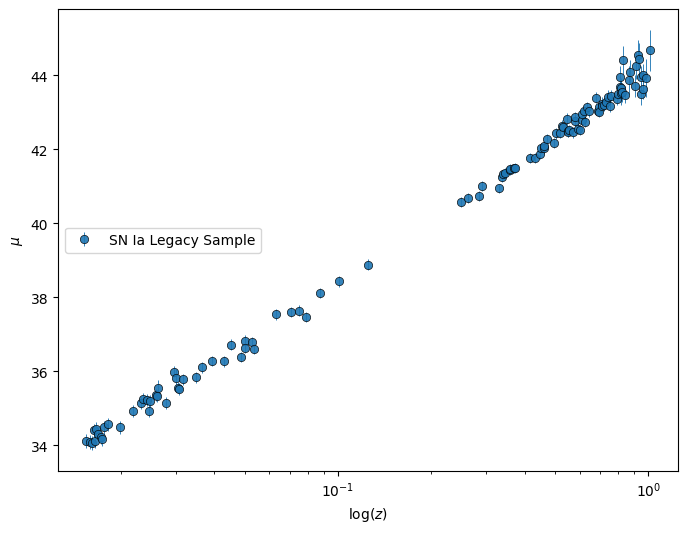

In [66]:
rcParams['figure.figsize'] = 8, 6
plt.errorbar(sample['z'], sample['mu'], yerr=sample['sigma'], fmt="o", markeredgecolor = 'k', markeredgewidth = 0.5, linewidth = 0.7, alpha = 0.9, label = 'SN Ia Legacy Sample')
plt.xscale('log')


plt.ylabel('$\mu$')
plt.xlabel('$\log(z)$')
plt.legend(loc='center left')
plt.savefig('images/hubble_diagram_snia.pdf')  

In [4]:
df = pd.DataFrame(sample)

In [5]:
df

,mu,sigma,z
0,34.11747,0.19292,0.01543
1,34.08234,0.19033,0.01588
2,34.07026,0.19618,0.01615
3,34.40483,0.18699,0.01631
4,34.12864,0.18648,0.01645
...,...,...,...
110,43.95315,0.29831,0.95000
111,43.62209,0.26844,0.96000
112,43.99927,0.31807,0.96100
113,43.94067,0.51326,0.98300


# Functions

In [6]:
c = 3e5 #(km/s)

def Dc(z, params):
    if len(params) == 3:
        def f(z, params):
            return (np.sqrt(params[0] + params[1]*(1 + z)**3))**(-1)
        return quad(f, 0, z, args = params[0:2])[0]
    else:
        def f(z, params):
            return (np.sqrt(params[0] + params[1]*(1 + z)**3 + params[3]*(1 + z)**2 + params[4]*(1 + z)**4))**(-1)
        return quad(f, 0, z, args = params)[0]

def Dt(z, params):
    if len(params) == 3:
        return Dc(z, params)
    else:
        return np.sinh(np.sqrt(params[3])*Dc(z, params))/np.sqrt(params[3])

def Dl(z, params):
    return (1 + z) * Dt(z, params)
               
def mu(z, params):
    return 5*np.log10(Dl(z, params)) + 25 + 5*np.log10(c/ params[2])

def chi2_i(mu_o, sigma_o, z_obs, params):
    return ((mu(z_obs, params) - mu_o)**2)/sigma_o**2

def chi2(params, df):
    values = []
    for idx in df.index:
        values.append(chi2_i(df.mu[idx], df.sigma[idx], df.z[idx], params))
    return sum(values)

# Item a)

## Maximum Likelihood Parameters

In [7]:
params = [0.75, 0.25, 71] # params = [Omega Lambda, Omega Matter, Hubble's Constant, Omega Curvature, Omega Radiation]

minimum = minimize(chi2, x0 = params, args = (df), method = 'Nelder-Mead', tol = 1e-6, bounds = ((0,1), (0,1), (0, None)))
print('Result of minimization:', '\n', minimum, '\n\n')
print('Maximum Likelihood Parameters:\n', f'Omega_Lambda: {minimum.x[0]}', '\n', f'Omega_Matter: {minimum.x[1]}', '\n', f'Hubble: {minimum.x[2]}')

Result of minimization: 
  final_simplex: (array([[ 0.73654492,  0.26206903, 70.11226543],
       [ 0.73654492,  0.26206903, 70.1122655 ],
       [ 0.73654491,  0.26206903, 70.11226594],
       [ 0.73654491,  0.26206903, 70.11226575]]), array([110.99870476, 110.99870476, 110.99870476, 110.99870476]))
           fun: 110.998704764517
       message: 'Optimization terminated successfully.'
          nfev: 193
           nit: 98
        status: 0
       success: True
             x: array([ 0.73654492,  0.26206903, 70.11226543]) 


Maximum Likelihood Parameters:
 Omega_Lambda: 0.736544919860062 
 Omega_Matter: 0.2620690317357481 
 Hubble: 70.11226542930314


## Confidence Region for $\Omega_{\Lambda}$ and $\Omega_m$

C:\Users\lucas.corbanez\AppData\Local\Temp\ipykernel_10620\96576753.py:6: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\lucas.corbanez\AppData\Local\Temp\ipykernel_10620\96576753.py:7: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.



Text(0, 0.5, '$\\Omega_m$')

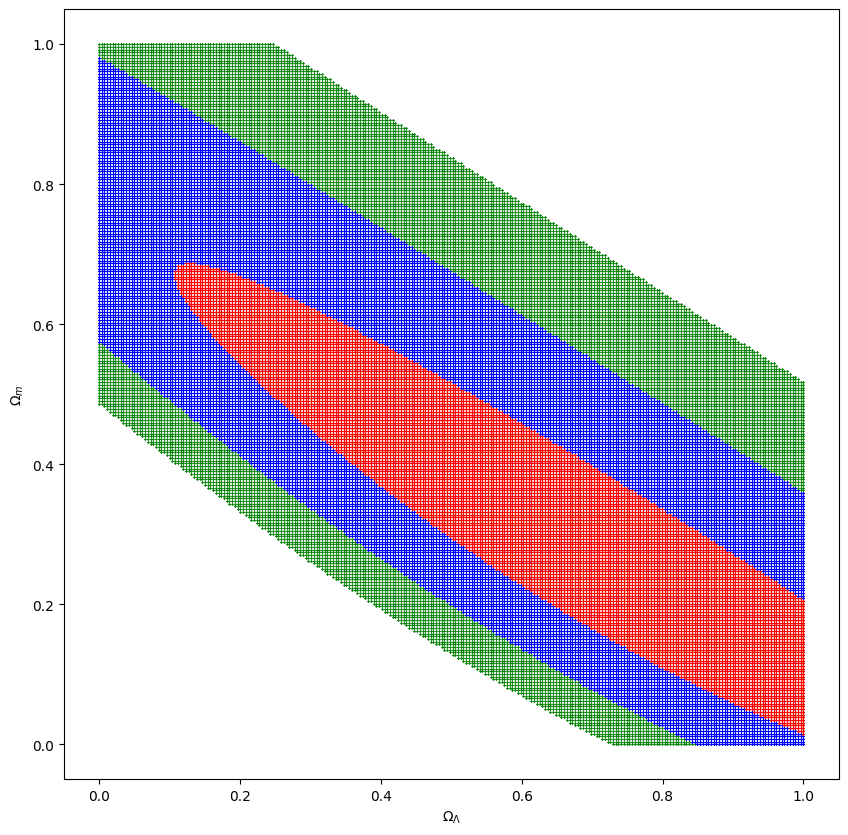

In [18]:
rcParams['figure.figsize'] = 10, 10

sigma1, sigma2, sigma3 = 0.6827, 0.9545, 0.9973
lambda1, lambda2, lambda3 = stats.chi2.ppf(sigma1, 2), stats.chi2.ppf(sigma2, 2), stats.chi2.ppf(sigma3, 2)

chi2null = chi2(minimum.x, df)

deltas = {'omegas': np.linspace(0, 1, 260), 'hubble': np.linspace(50, 100, 260)}

for idx in deltas['omegas']:
    for idx2 in deltas['omegas']:
        params = [idx, idx2, minimum.x[2]]
        chi2alt = chi2(params, df)
        
        if chi2alt/chi2null < lambda1:
            plt.scatter(params[0], params[1], s = 1, marker = 'x', color = 'red', label = '$3\sigma$')
            
        elif lambda1 < chi2alt/chi2null < lambda2:
            plt.scatter(params[0], params[1], s = 0.75, marker = 'x', color = 'blue', label = '$2\sigma$')
            
        elif lambda2< chi2alt/chi2null < lambda3:
            plt.scatter(params[0], params[1], s = 0.5, marker = 'x', color = 'green', label = '$1\sigma$')
            
plt.xlabel('$\Omega_{\Lambda}$')
plt.ylabel('$\Omega_m$')

# Item b)

In [9]:
params = [0.74, 0.24, 71, 0.02, 1e-5] # params = [Omega Lambda, Omega Matter, Hubble's Constant, Omega Curvature, Omega Radiation]

minimum = minimize(chi2, x0 = params, args = (df), method = 'Nelder-Mead', tol = 1e-6, bounds = ((0,0.77), (0,0.26), (0, None), (0,1), (0,1)))
print('Result of minimization:', '\n', minimum, '\n\n')
print('Maximum Likelihood Parameters:\n', f'Omega_Lambda: {minimum.x[0]}', '\n', f'Omega_Matter: {minimum.x[1]}', '\n', f'Omega_Curvature: {minimum.x[3]}', '\n', f'Omega_Radiation: {minimum.x[4]}', '\n', f'Hubble: {minimum.x[2]}')

C:\Users\lucas.corbanez\AppData\Local\Temp\ipykernel_10620\96576753.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sinh(np.sqrt(params[3])*Dc(z, params))/np.sqrt(params[3])


Result of minimization: 
  final_simplex: (array([[7.23055269e-01, 2.57253358e-01, 7.07635595e+01, 7.88467863e-14,
        8.19018864e-06],
       [7.23055251e-01, 2.57253359e-01, 7.07635600e+01, 2.04685809e-13,
        8.19018841e-06],
       [7.23055254e-01, 2.57253359e-01, 7.07635599e+01, 2.75209527e-13,
        8.19018845e-06],
       [7.23055263e-01, 2.57253358e-01, 7.07635597e+01, 3.41272294e-13,
        8.19018855e-06],
       [7.23055252e-01, 2.57253359e-01, 7.07635600e+01, 2.53997667e-13,
        8.19018839e-06],
       [7.23055244e-01, 2.57253359e-01, 7.07635602e+01, 2.19768428e-13,
        8.19018837e-06]]), array([110.99869098, 110.99869098, 110.99869098, 110.99869098,
       110.99869098, 110.99869098]))
           fun: 110.99869097716466
       message: 'Optimization terminated successfully.'
          nfev: 789
           nit: 471
        status: 0
       success: True
             x: array([7.23055269e-01, 2.57253358e-01, 7.07635595e+01, 7.88467863e-14,
       8.1901886

# Spectral plot of ASASSN-15bc; AstroCatalog 2015-2019

In [10]:
asassn15bc = {
	"ASASSN-15cb":{
		"schema":"https://github.com/astrocatalogs/supernovae/blob/d3ef5fc/SCHEMA.md",
		"name":"ASASSN-15cb",
		"sources":[
			{
				"name":"2016A&A...594A..13P",
				"bibcode":"2016A&A...594A..13P",
				"reference":"Planck Collaboration et al. (2016)",
				"alias":"1"
			},
			{
				"name":"2015ATel.6990....1H",
				"bibcode":"2015ATel.6990....1H",
				"reference":"Holoien et al. (2015)",
				"alias":"2"
			},
			{
				"name":"2015ATel.6994....1N",
				"bibcode":"2015ATel.6994....1N",
				"reference":"Nyholm et al. (2015)",
				"alias":"3"
			},
			{
				"name":"2011ApJ...737..103S",
				"bibcode":"2011ApJ...737..103S",
				"reference":"Schlafly & Finkbeiner (2011)",
				"alias":"4"
			},
			{
				"name":"ASAS-SN Supernovae",
				"url":"http://www.astronomy.ohio-state.edu/~assassin/sn_list.html",
				"alias":"5"
			},
			{
				"name":"Latest Supernovae",
				"secondary":True,
				"url":"http://www.rochesterastronomy.org/snimages/snredshiftall.html",
				"alias":"6"
			},
			{
				"name":"The Open Supernova Catalog",
				"bibcode":"2017ApJ...835...64G",
				"reference":"Guillochon et al. (2017)",
				"secondary":True,
				"url":"https://sne.space",
				"alias":"7"
			},
			{
				"name":"WISeREP",
				"bibcode":"2012PASP..124..668Y",
				"reference":"Yaron & Gal-Yam (2012)",
				"secondary":True,
				"url":"http://wiserep.weizmann.ac.il/",
				"alias":"8"
			},
			{
				"name":"SIMBAD astronomical database",
				"bibcode":"2000A&AS..143....9W",
				"reference":"Wenger et al. (2000)",
				"secondary":True,
				"url":"http://simbad.u-strasbg.fr/",
				"alias":"9"
			}
		],
		"alias":[
			{
				"value":"ASASSN-15cb",
				"source":"2,5,6,8,9"
			},
			{
				"value":"PS15ee",
				"source":"2,6"
			}
		],
		"claimedtype":[
			{
				"value":"Ia",
				"source":"2,3,5,6,8,9"
			}
		],
		"comovingdist":[
			{
				"value":"175.54",
				"derived":True,
				"u_value":"Mpc",
				"source":"1,2,5,7"
			}
		],
		"dec":[
			{
				"value":"+03:47:49.77",
				"u_value":"degrees",
				"source":"2,9"
			},
			{
				"value":"+03:47:49.8",
				"u_value":"degrees",
				"source":"2,6"
			},
			{
				"value":"+03:47:49.74",
				"u_value":"degrees",
				"source":"2,5"
			}
		],
		"discoverdate":[
			{
				"value":"2015/01/21",
				"source":"2,6"
			}
		],
		"discoverer":[
			{
				"value":"ASAS-SN",
				"source":"2,6"
			}
		],
		"ebv":[
			{
				"value":"0.0279",
				"derived":True,
				"e_value":"0.0014",
				"source":"4,7"
			}
		],
		"host":[
			{
				"value":"CGCG 042-196",
				"source":"2,5,6"
			}
		],
		"hostoffsetang":[
			{
				"value":"0.51",
				"u_value":"arcseconds",
				"source":"2,5"
			}
		],
		"lumdist":[
			{
				"value":"182.565",
				"derived":True,
				"u_value":"Mpc",
				"source":"1,2,5,7"
			}
		],
		"maxabsmag":[
			{
				"value":"-20.2645",
				"derived":True,
				"source":"1,2,5,7"
			}
		],
		"maxappmag":[
			{
				"value":"16",
				"derived":True,
				"source":"2,6,7"
			}
		],
		"maxdate":[
			{
				"value":"2015/01/28",
				"derived":True,
				"source":"2,6,7"
			}
		],
		"maxvisualabsmag":[
			{
				"value":"-20.3071",
				"derived":True,
				"source":"1,2,5,7"
			}
		],
		"maxvisualappmag":[
			{
				"value":"16",
				"derived":True,
				"source":"2,6,7"
			}
		],
		"maxvisualdate":[
			{
				"value":"2015/01/28",
				"derived":True,
				"source":"2,6,7"
			}
		],
		"ra":[
			{
				"value":"12:39:50.230",
				"u_value":"hours",
				"source":"2,9"
			},
			{
				"value":"12:39:50.23",
				"u_value":"hours",
				"source":"2,6"
			},
			{
				"value":"12:39:50.16",
				"u_value":"hours",
				"source":"2,5"
			}
		],
		"redshift":[
			{
				"value":"0.040038",
				"source":"2,5"
			}
		],
		"velocity":[
			{
				"value":"11763",
				"u_value":"km/s",
				"source":"7"
			}
		],
		"photometry":[
			{
				"time":"57050.5",
				"magnitude":"16.0",
				"u_time":"MJD",
				"source":"2,6"
			}
		],
		"spectra":[
			{
				"time":"57048.0",
				"filename":"tASASSN-15cb_20150125_Gr13_Free_slit1.0_1_f.asci",
				"instrument":"ESO-NTT - EFOSC2-NTT",
				"observer":"A. Nyholm, C. Fremling",
				"redshift":"0.04",
				"reducer":"K. Migotto, F. Taddia, J. Sollerman",
				"reduction":"rapid",
				"survey":"PESSTO",
				"u_fluxes":"erg/s/cm^2/Angstrom",
				"u_time":"MJD",
				"u_wavelengths":"Angstrom",
				"data":[
					[
						"3644.047852",
						"5.18171e-16"
					],
					[
						"3649.56578",
						"6.64534e-16"
					],
					[
						"3655.083709",
						"6.73311e-16"
					],
					[
						"3660.601637",
						"5.45997e-16"
					],
					[
						"3666.119566",
						"6.15033e-16"
					],
					[
						"3671.637495",
						"8.02848e-16"
					],
					[
						"3677.155423",
						"4.80328e-16"
					],
					[
						"3682.673352",
						"6.55007e-16"
					],
					[
						"3688.19128",
						"6.95019e-16"
					],
					[
						"3693.709209",
						"7.07052e-16"
					],
					[
						"3699.227138",
						"5.98652e-16"
					],
					[
						"3704.745066",
						"5.85941e-16"
					],
					[
						"3710.262995",
						"6.04101e-16"
					],
					[
						"3715.780923",
						"5.99303e-16"
					],
					[
						"3721.298852",
						"5.58901e-16"
					],
					[
						"3726.816781",
						"5.14524e-16"
					],
					[
						"3732.334709",
						"6.78666e-16"
					],
					[
						"3737.852638",
						"6.65011e-16"
					],
					[
						"3743.370566",
						"5.56449e-16"
					],
					[
						"3748.888495",
						"5.86652e-16"
					],
					[
						"3754.406424",
						"5.43082e-16"
					],
					[
						"3759.924352",
						"5.25002e-16"
					],
					[
						"3765.442281",
						"5.31089e-16"
					],
					[
						"3770.960209",
						"5.68283e-16"
					],
					[
						"3776.478138",
						"5.08436e-16"
					],
					[
						"3781.996067",
						"5.93501e-16"
					],
					[
						"3787.513995",
						"4.85014e-16"
					],
					[
						"3793.031924",
						"4.653e-16"
					],
					[
						"3798.549852",
						"3.23687e-16"
					],
					[
						"3804.067781",
						"3.63726e-16"
					],
					[
						"3809.58571",
						"3.54163e-16"
					],
					[
						"3815.103638",
						"3.19271e-16"
					],
					[
						"3820.621567",
						"2.70687e-16"
					],
					[
						"3826.139495",
						"2.4953e-16"
					],
					[
						"3831.657424",
						"2.21971e-16"
					],
					[
						"3837.175353",
						"3.18367e-16"
					],
					[
						"3842.693281",
						"2.47793e-16"
					],
					[
						"3848.21121",
						"2.08105e-16"
					],
					[
						"3853.729138",
						"2.30302e-16"
					],
					[
						"3859.247067",
						"2.95912e-16"
					],
					[
						"3864.764996",
						"2.04879e-16"
					],
					[
						"3870.282924",
						"3.10179e-16"
					],
					[
						"3875.800853",
						"3.01099e-16"
					],
					[
						"3881.318781",
						"2.7102e-16"
					],
					[
						"3886.83671",
						"2.92943e-16"
					],
					[
						"3892.354639",
						"2.56242e-16"
					],
					[
						"3897.872567",
						"2.8751e-16"
					],
					[
						"3903.390496",
						"2.47511e-16"
					],
					[
						"3908.908424",
						"2.54997e-16"
					],
					[
						"3914.426353",
						"2.52613e-16"
					],
					[
						"3919.944282",
						"3.09829e-16"
					],
					[
						"3925.46221",
						"3.70863e-16"
					],
					[
						"3930.980139",
						"2.8153e-16"
					],
					[
						"3936.498067",
						"3.69814e-16"
					],
					[
						"3942.015996",
						"3.91999e-16"
					],
					[
						"3947.533925",
						"3.92194e-16"
					],
					[
						"3953.051853",
						"3.71718e-16"
					],
					[
						"3958.569782",
						"4.54974e-16"
					],
					[
						"3964.08771",
						"4.09793e-16"
					],
					[
						"3969.605639",
						"4.50764e-16"
					],
					[
						"3975.123568",
						"5.25373e-16"
					],
					[
						"3980.641496",
						"4.63557e-16"
					],
					[
						"3986.159425",
						"5.30698e-16"
					],
					[
						"3991.677353",
						"5.43765e-16"
					],
					[
						"3997.195282",
						"6.15647e-16"
					],
					[
						"4002.713211",
						"5.67879e-16"
					],
					[
						"4008.231139",
						"6.66277e-16"
					],
					[
						"4013.749068",
						"6.41145e-16"
					],
					[
						"4019.266996",
						"6.91856e-16"
					],
					[
						"4024.784925",
						"6.89879e-16"
					],
					[
						"4030.302854",
						"6.47056e-16"
					],
					[
						"4035.820782",
						"7.06909e-16"
					],
					[
						"4041.338711",
						"7.07101e-16"
					],
					[
						"4046.856639",
						"7.67272e-16"
					],
					[
						"4052.374568",
						"7.21302e-16"
					],
					[
						"4057.892497",
						"7.82917e-16"
					],
					[
						"4063.410425",
						"7.28416e-16"
					],
					[
						"4068.928354",
						"7.80551e-16"
					],
					[
						"4074.446282",
						"7.84978e-16"
					],
					[
						"4079.964211",
						"7.79779e-16"
					],
					[
						"4085.48214",
						"7.70964e-16"
					],
					[
						"4091.000068",
						"7.12957e-16"
					],
					[
						"4096.517997",
						"7.5209e-16"
					],
					[
						"4102.035925",
						"7.58159e-16"
					],
					[
						"4107.553854",
						"7.52506e-16"
					],
					[
						"4113.071783",
						"7.74738e-16"
					],
					[
						"4118.589711",
						"7.50793e-16"
					],
					[
						"4124.10764",
						"7.49683e-16"
					],
					[
						"4129.625568",
						"7.3204e-16"
					],
					[
						"4135.143497",
						"7.65115e-16"
					],
					[
						"4140.661426",
						"7.77564e-16"
					],
					[
						"4146.179354",
						"7.82857e-16"
					],
					[
						"4151.697283",
						"7.3616e-16"
					],
					[
						"4157.215211",
						"7.15136e-16"
					],
					[
						"4162.73314",
						"7.24539e-16"
					],
					[
						"4168.251069",
						"6.96145e-16"
					],
					[
						"4173.768997",
						"7.41767e-16"
					],
					[
						"4179.286926",
						"7.45958e-16"
					],
					[
						"4184.804854",
						"6.87605e-16"
					],
					[
						"4190.322783",
						"6.72515e-16"
					],
					[
						"4195.840712",
						"7.28678e-16"
					],
					[
						"4201.35864",
						"7.55577e-16"
					],
					[
						"4206.876569",
						"7.36466e-16"
					],
					[
						"4212.394497",
						"7.37839e-16"
					],
					[
						"4217.912426",
						"6.86294e-16"
					],
					[
						"4223.430355",
						"6.86332e-16"
					],
					[
						"4228.948283",
						"6.97208e-16"
					],
					[
						"4234.466212",
						"6.63304e-16"
					],
					[
						"4239.98414",
						"7.55786e-16"
					],
					[
						"4245.502069",
						"8.11919e-16"
					],
					[
						"4251.019998",
						"7.50843e-16"
					],
					[
						"4256.537926",
						"7.25555e-16"
					],
					[
						"4262.055855",
						"7.83411e-16"
					],
					[
						"4267.573783",
						"7.44103e-16"
					],
					[
						"4273.091712",
						"7.82279e-16"
					],
					[
						"4278.609641",
						"7.9091e-16"
					],
					[
						"4284.127569",
						"7.72588e-16"
					],
					[
						"4289.645498",
						"7.53365e-16"
					],
					[
						"4295.163426",
						"7.39056e-16"
					],
					[
						"4300.681355",
						"7.07857e-16"
					],
					[
						"4306.199284",
						"7.39503e-16"
					],
					[
						"4311.717212",
						"7.54644e-16"
					],
					[
						"4317.235141",
						"6.84787e-16"
					],
					[
						"4322.753069",
						"6.77365e-16"
					],
					[
						"4328.270998",
						"7.00528e-16"
					],
					[
						"4333.788927",
						"6.66113e-16"
					],
					[
						"4339.306855",
						"6.64197e-16"
					],
					[
						"4344.824784",
						"6.89663e-16"
					],
					[
						"4350.342712",
						"6.22522e-16"
					],
					[
						"4355.860641",
						"6.34237e-16"
					],
					[
						"4361.37857",
						"6.14822e-16"
					],
					[
						"4366.896498",
						"6.01799e-16"
					],
					[
						"4372.414427",
						"5.96888e-16"
					],
					[
						"4377.932355",
						"5.54737e-16"
					],
					[
						"4383.450284",
						"5.66873e-16"
					],
					[
						"4388.968213",
						"5.72625e-16"
					],
					[
						"4394.486141",
						"5.14457e-16"
					],
					[
						"4400.00407",
						"5.29964e-16"
					],
					[
						"4405.521998",
						"5.32435e-16"
					],
					[
						"4411.039927",
						"4.9742e-16"
					],
					[
						"4416.557856",
						"4.94385e-16"
					],
					[
						"4422.075784",
						"4.72362e-16"
					],
					[
						"4427.593713",
						"4.89814e-16"
					],
					[
						"4433.111641",
						"4.34425e-16"
					],
					[
						"4438.62957",
						"4.33902e-16"
					],
					[
						"4444.147499",
						"4.07179e-16"
					],
					[
						"4449.665427",
						"4.10639e-16"
					],
					[
						"4455.183356",
						"4.13301e-16"
					],
					[
						"4460.701284",
						"4.19233e-16"
					],
					[
						"4466.219213",
						"3.97875e-16"
					],
					[
						"4471.737142",
						"3.75876e-16"
					],
					[
						"4477.25507",
						"4.00315e-16"
					],
					[
						"4482.772999",
						"3.76839e-16"
					],
					[
						"4488.290927",
						"3.5915e-16"
					],
					[
						"4493.808856",
						"3.86257e-16"
					],
					[
						"4499.326785",
						"3.71984e-16"
					],
					[
						"4504.844713",
						"4.111e-16"
					],
					[
						"4510.362642",
						"3.9631e-16"
					],
					[
						"4515.88057",
						"4.51681e-16"
					],
					[
						"4521.398499",
						"4.11057e-16"
					],
					[
						"4526.916428",
						"4.1135e-16"
					],
					[
						"4532.434356",
						"4.13127e-16"
					],
					[
						"4537.952285",
						"4.36984e-16"
					],
					[
						"4543.470213",
						"4.70435e-16"
					],
					[
						"4548.988142",
						"5.1961e-16"
					],
					[
						"4554.506071",
						"4.73834e-16"
					],
					[
						"4560.023999",
						"4.88495e-16"
					],
					[
						"4565.541928",
						"5.42508e-16"
					],
					[
						"4571.059856",
						"5.26933e-16"
					],
					[
						"4576.577785",
						"5.38391e-16"
					],
					[
						"4582.095714",
						"5.78123e-16"
					],
					[
						"4587.613642",
						"5.01991e-16"
					],
					[
						"4593.131571",
						"5.42517e-16"
					],
					[
						"4598.649499",
						"5.25959e-16"
					],
					[
						"4604.167428",
						"5.47019e-16"
					],
					[
						"4609.685357",
						"5.33972e-16"
					],
					[
						"4615.203285",
						"5.24427e-16"
					],
					[
						"4620.721214",
						"5.08757e-16"
					],
					[
						"4626.239142",
						"5.18086e-16"
					],
					[
						"4631.757071",
						"5.06384e-16"
					],
					[
						"4637.275",
						"5.40743e-16"
					],
					[
						"4642.792928",
						"5.62871e-16"
					],
					[
						"4648.310857",
						"5.62359e-16"
					],
					[
						"4653.828785",
						"5.82151e-16"
					],
					[
						"4659.346714",
						"5.60853e-16"
					],
					[
						"4664.864643",
						"5.89826e-16"
					],
					[
						"4670.382571",
						"6.29135e-16"
					],
					[
						"4675.9005",
						"6.14131e-16"
					],
					[
						"4681.418428",
						"6.22459e-16"
					],
					[
						"4686.936357",
						"6.595e-16"
					],
					[
						"4692.454286",
						"6.54972e-16"
					],
					[
						"4697.972214",
						"6.60124e-16"
					],
					[
						"4703.490143",
						"6.11064e-16"
					],
					[
						"4709.008071",
						"6.4402e-16"
					],
					[
						"4714.526",
						"6.58751e-16"
					],
					[
						"4720.043929",
						"6.36308e-16"
					],
					[
						"4725.561857",
						"6.54487e-16"
					],
					[
						"4731.079786",
						"6.189e-16"
					],
					[
						"4736.597714",
						"6.35715e-16"
					],
					[
						"4742.115643",
						"6.20599e-16"
					],
					[
						"4747.633572",
						"5.9647e-16"
					],
					[
						"4753.1515",
						"6.19516e-16"
					],
					[
						"4758.669429",
						"6.14906e-16"
					],
					[
						"4764.187357",
						"5.91349e-16"
					],
					[
						"4769.705286",
						"5.84387e-16"
					],
					[
						"4775.223215",
						"5.75218e-16"
					],
					[
						"4780.741143",
						"5.65494e-16"
					],
					[
						"4786.259072",
						"5.52208e-16"
					],
					[
						"4791.777",
						"5.68334e-16"
					],
					[
						"4797.294929",
						"5.51814e-16"
					],
					[
						"4802.812858",
						"5.49287e-16"
					],
					[
						"4808.330786",
						"5.07965e-16"
					],
					[
						"4813.848715",
						"5.25147e-16"
					],
					[
						"4819.366643",
						"5.38926e-16"
					],
					[
						"4824.884572",
						"5.0944e-16"
					],
					[
						"4830.402501",
						"5.27572e-16"
					],
					[
						"4835.920429",
						"4.99226e-16"
					],
					[
						"4841.438358",
						"5.55944e-16"
					],
					[
						"4846.956286",
						"5.22795e-16"
					],
					[
						"4852.474215",
						"4.91358e-16"
					],
					[
						"4857.992144",
						"4.77987e-16"
					],
					[
						"4863.510072",
						"4.99668e-16"
					],
					[
						"4869.028001",
						"4.70402e-16"
					],
					[
						"4874.545929",
						"4.25728e-16"
					],
					[
						"4880.063858",
						"4.33113e-16"
					],
					[
						"4885.581787",
						"4.44633e-16"
					],
					[
						"4891.099715",
						"4.33356e-16"
					],
					[
						"4896.617644",
						"4.06047e-16"
					],
					[
						"4902.135572",
						"4.4086e-16"
					],
					[
						"4907.653501",
						"4.23269e-16"
					],
					[
						"4913.17143",
						"4.46777e-16"
					],
					[
						"4918.689358",
						"4.40048e-16"
					],
					[
						"4924.207287",
						"4.12817e-16"
					],
					[
						"4929.725215",
						"4.21353e-16"
					],
					[
						"4935.243144",
						"4.32951e-16"
					],
					[
						"4940.761073",
						"4.21283e-16"
					],
					[
						"4946.279001",
						"3.92922e-16"
					],
					[
						"4951.79693",
						"4.08106e-16"
					],
					[
						"4957.314858",
						"4.11959e-16"
					],
					[
						"4962.832787",
						"3.82995e-16"
					],
					[
						"4968.350716",
						"3.7944e-16"
					],
					[
						"4973.868644",
						"4.00424e-16"
					],
					[
						"4979.386573",
						"4.33316e-16"
					],
					[
						"4984.904501",
						"4.2828e-16"
					],
					[
						"4990.42243",
						"3.94664e-16"
					],
					[
						"4995.940359",
						"4.16003e-16"
					],
					[
						"5001.458287",
						"3.97205e-16"
					],
					[
						"5006.976216",
						"4.11949e-16"
					],
					[
						"5012.494144",
						"4.03094e-16"
					],
					[
						"5018.012073",
						"4.30961e-16"
					],
					[
						"5023.530002",
						"4.49203e-16"
					],
					[
						"5029.04793",
						"4.2017e-16"
					],
					[
						"5034.565859",
						"3.98918e-16"
					],
					[
						"5040.083787",
						"4.11999e-16"
					],
					[
						"5045.601716",
						"4.14105e-16"
					],
					[
						"5051.119645",
						"3.90898e-16"
					],
					[
						"5056.637573",
						"4.34944e-16"
					],
					[
						"5062.155502",
						"4.07289e-16"
					],
					[
						"5067.67343",
						"4.06167e-16"
					],
					[
						"5073.191359",
						"3.79828e-16"
					],
					[
						"5078.709288",
						"3.73182e-16"
					],
					[
						"5084.227216",
						"3.64066e-16"
					],
					[
						"5089.745145",
						"3.67931e-16"
					],
					[
						"5095.263073",
						"3.31069e-16"
					],
					[
						"5100.781002",
						"3.42781e-16"
					],
					[
						"5106.298931",
						"3.41843e-16"
					],
					[
						"5111.816859",
						"3.35227e-16"
					],
					[
						"5117.334788",
						"3.2811e-16"
					],
					[
						"5122.852716",
						"3.53049e-16"
					],
					[
						"5128.370645",
						"3.46183e-16"
					],
					[
						"5133.888574",
						"3.6151e-16"
					],
					[
						"5139.406502",
						"3.673e-16"
					],
					[
						"5144.924431",
						"3.51142e-16"
					],
					[
						"5150.442359",
						"3.73969e-16"
					],
					[
						"5155.960288",
						"3.74146e-16"
					],
					[
						"5161.478217",
						"3.57031e-16"
					],
					[
						"5166.996145",
						"3.73463e-16"
					],
					[
						"5172.514074",
						"3.87391e-16"
					],
					[
						"5178.032002",
						"3.69053e-16"
					],
					[
						"5183.549931",
						"3.87173e-16"
					],
					[
						"5189.06786",
						"3.93046e-16"
					],
					[
						"5194.585788",
						"3.79156e-16"
					],
					[
						"5200.103717",
						"3.82699e-16"
					],
					[
						"5205.621645",
						"4.245e-16"
					],
					[
						"5211.139574",
						"4.14298e-16"
					],
					[
						"5216.657503",
						"4.06904e-16"
					],
					[
						"5222.175431",
						"4.21887e-16"
					],
					[
						"5227.69336",
						"4.36971e-16"
					],
					[
						"5233.211288",
						"4.38037e-16"
					],
					[
						"5238.729217",
						"4.33037e-16"
					],
					[
						"5244.247146",
						"4.48087e-16"
					],
					[
						"5249.765074",
						"4.81989e-16"
					],
					[
						"5255.283003",
						"4.56436e-16"
					],
					[
						"5260.800931",
						"5.02575e-16"
					],
					[
						"5266.31886",
						"4.69626e-16"
					],
					[
						"5271.836789",
						"4.67447e-16"
					],
					[
						"5277.354717",
						"4.61238e-16"
					],
					[
						"5282.872646",
						"4.31109e-16"
					],
					[
						"5288.390574",
						"4.90824e-16"
					],
					[
						"5293.908503",
						"4.54426e-16"
					],
					[
						"5299.426432",
						"4.59143e-16"
					],
					[
						"5304.94436",
						"5.0998e-16"
					],
					[
						"5310.462289",
						"4.95836e-16"
					],
					[
						"5315.980217",
						"4.88639e-16"
					],
					[
						"5321.498146",
						"5.13179e-16"
					],
					[
						"5327.016075",
						"4.88957e-16"
					],
					[
						"5332.534003",
						"5.12564e-16"
					],
					[
						"5338.051932",
						"5.02888e-16"
					],
					[
						"5343.56986",
						"5.18246e-16"
					],
					[
						"5349.087789",
						"5.1915e-16"
					],
					[
						"5354.605718",
						"5.2223e-16"
					],
					[
						"5360.123646",
						"4.99345e-16"
					],
					[
						"5365.641575",
						"5.11007e-16"
					],
					[
						"5371.159503",
						"4.58841e-16"
					],
					[
						"5376.677432",
						"5.10726e-16"
					],
					[
						"5382.195361",
						"5.00986e-16"
					],
					[
						"5387.713289",
						"4.87136e-16"
					],
					[
						"5393.231218",
						"5.05727e-16"
					],
					[
						"5398.749146",
						"4.61227e-16"
					],
					[
						"5404.267075",
						"4.75894e-16"
					],
					[
						"5409.785004",
						"4.85575e-16"
					],
					[
						"5415.302932",
						"4.80817e-16"
					],
					[
						"5420.820861",
						"4.86652e-16"
					],
					[
						"5426.338789",
						"5.30088e-16"
					],
					[
						"5431.856718",
						"4.63471e-16"
					],
					[
						"5437.374647",
						"4.98647e-16"
					],
					[
						"5442.892575",
						"4.69501e-16"
					],
					[
						"5448.410504",
						"4.87451e-16"
					],
					[
						"5453.928432",
						"4.45772e-16"
					],
					[
						"5459.446361",
						"4.43356e-16"
					],
					[
						"5464.96429",
						"4.41484e-16"
					],
					[
						"5470.482218",
						"4.5964e-16"
					],
					[
						"5476.000147",
						"4.34331e-16"
					],
					[
						"5481.518075",
						"3.96554e-16"
					],
					[
						"5487.036004",
						"3.73097e-16"
					],
					[
						"5492.553933",
						"4.33851e-16"
					],
					[
						"5498.071861",
						"4.14468e-16"
					],
					[
						"5503.58979",
						"4.10686e-16"
					],
					[
						"5509.107718",
						"3.83427e-16"
					],
					[
						"5514.625647",
						"3.79632e-16"
					],
					[
						"5520.143576",
						"3.68133e-16"
					],
					[
						"5525.661504",
						"3.50249e-16"
					],
					[
						"5531.179433",
						"3.32288e-16"
					],
					[
						"5536.697361",
						"3.85952e-16"
					],
					[
						"5542.21529",
						"3.57599e-16"
					],
					[
						"5547.733219",
						"3.43581e-16"
					],
					[
						"5553.251147",
						"3.76351e-16"
					],
					[
						"5558.769076",
						"3.60083e-16"
					],
					[
						"5564.287004",
						"3.96291e-16"
					],
					[
						"5569.804933",
						"3.47881e-16"
					],
					[
						"5575.322862",
						"3.96167e-16"
					],
					[
						"5580.84079",
						"3.97345e-16"
					],
					[
						"5586.358719",
						"3.90761e-16"
					],
					[
						"5591.876647",
						"4.03278e-16"
					],
					[
						"5597.394576",
						"4.13623e-16"
					],
					[
						"5602.912505",
						"4.08213e-16"
					],
					[
						"5608.430433",
						"4.00907e-16"
					],
					[
						"5613.948362",
						"4.0754e-16"
					],
					[
						"5619.46629",
						"3.72111e-16"
					],
					[
						"5624.984219",
						"3.99273e-16"
					],
					[
						"5630.502148",
						"3.68334e-16"
					],
					[
						"5636.020076",
						"4.15364e-16"
					],
					[
						"5641.538005",
						"3.62461e-16"
					],
					[
						"5647.055933",
						"4.18163e-16"
					],
					[
						"5652.573862",
						"3.6898e-16"
					],
					[
						"5658.091791",
						"3.50497e-16"
					],
					[
						"5663.609719",
						"4.09774e-16"
					],
					[
						"5669.127648",
						"3.71549e-16"
					],
					[
						"5674.645576",
						"3.49682e-16"
					],
					[
						"5680.163505",
						"3.2033e-16"
					],
					[
						"5685.681434",
						"3.26969e-16"
					],
					[
						"5691.199362",
						"3.08683e-16"
					],
					[
						"5696.717291",
						"3.38527e-16"
					],
					[
						"5702.235219",
						"3.39816e-16"
					],
					[
						"5707.753148",
						"3.42316e-16"
					],
					[
						"5713.271077",
						"3.35974e-16"
					],
					[
						"5718.789005",
						"3.42706e-16"
					],
					[
						"5724.306934",
						"3.36112e-16"
					],
					[
						"5729.824862",
						"3.24625e-16"
					],
					[
						"5735.342791",
						"3.64783e-16"
					],
					[
						"5740.86072",
						"3.55858e-16"
					],
					[
						"5746.378648",
						"3.75402e-16"
					],
					[
						"5751.896577",
						"3.64809e-16"
					],
					[
						"5757.414505",
						"3.72055e-16"
					],
					[
						"5762.932434",
						"3.6458e-16"
					],
					[
						"5768.450363",
						"3.77635e-16"
					],
					[
						"5773.968291",
						"3.7597e-16"
					],
					[
						"5779.48622",
						"3.91935e-16"
					],
					[
						"5785.004148",
						"4.08473e-16"
					],
					[
						"5790.522077",
						"3.88155e-16"
					],
					[
						"5796.040006",
						"4.23854e-16"
					],
					[
						"5801.557934",
						"4.25257e-16"
					],
					[
						"5807.075863",
						"4.12409e-16"
					],
					[
						"5812.593791",
						"4.3666e-16"
					],
					[
						"5818.11172",
						"4.30201e-16"
					],
					[
						"5823.629649",
						"4.17768e-16"
					],
					[
						"5829.147577",
						"4.01757e-16"
					],
					[
						"5834.665506",
						"4.27485e-16"
					],
					[
						"5840.183434",
						"4.0787e-16"
					],
					[
						"5845.701363",
						"4.12522e-16"
					],
					[
						"5851.219292",
						"4.13249e-16"
					],
					[
						"5856.73722",
						"3.95137e-16"
					],
					[
						"5862.255149",
						"4.08257e-16"
					],
					[
						"5867.773077",
						"4.23724e-16"
					],
					[
						"5873.291006",
						"3.93221e-16"
					],
					[
						"5878.808935",
						"4.08744e-16"
					],
					[
						"5884.326863",
						"4.05527e-16"
					],
					[
						"5889.844792",
						"4.10355e-16"
					],
					[
						"5895.36272",
						"4.31976e-16"
					],
					[
						"5900.880649",
						"4.25434e-16"
					],
					[
						"5906.398578",
						"4.2539e-16"
					],
					[
						"5911.916506",
						"4.24059e-16"
					],
					[
						"5917.434435",
						"4.1067e-16"
					],
					[
						"5922.952363",
						"4.20624e-16"
					],
					[
						"5928.470292",
						"4.014e-16"
					],
					[
						"5933.988221",
						"3.89587e-16"
					],
					[
						"5939.506149",
						"3.89158e-16"
					],
					[
						"5945.024078",
						"3.7777e-16"
					],
					[
						"5950.542006",
						"3.54027e-16"
					],
					[
						"5956.059935",
						"3.68849e-16"
					],
					[
						"5961.577864",
						"3.95036e-16"
					],
					[
						"5967.095792",
						"3.68867e-16"
					],
					[
						"5972.613721",
						"3.88363e-16"
					],
					[
						"5978.131649",
						"4.09153e-16"
					],
					[
						"5983.649578",
						"3.99634e-16"
					],
					[
						"5989.167507",
						"4.04252e-16"
					],
					[
						"5994.685435",
						"3.84265e-16"
					],
					[
						"6000.203364",
						"4.02499e-16"
					],
					[
						"6005.721293",
						"4.00848e-16"
					],
					[
						"6011.239221",
						"3.64109e-16"
					],
					[
						"6016.75715",
						"3.5054e-16"
					],
					[
						"6022.275078",
						"3.62099e-16"
					],
					[
						"6027.793007",
						"3.64305e-16"
					],
					[
						"6033.310935",
						"3.21893e-16"
					],
					[
						"6038.828864",
						"3.70047e-16"
					],
					[
						"6044.346793",
						"3.52727e-16"
					],
					[
						"6049.864721",
						"3.3968e-16"
					],
					[
						"6055.38265",
						"3.52276e-16"
					],
					[
						"6060.900578",
						"3.71421e-16"
					],
					[
						"6066.418507",
						"3.87536e-16"
					],
					[
						"6071.936436",
						"3.78315e-16"
					],
					[
						"6077.454364",
						"3.38622e-16"
					],
					[
						"6082.972293",
						"3.64827e-16"
					],
					[
						"6088.490222",
						"3.87998e-16"
					],
					[
						"6094.00815",
						"4.05034e-16"
					],
					[
						"6099.526079",
						"3.76242e-16"
					],
					[
						"6105.044007",
						"3.66454e-16"
					],
					[
						"6110.561936",
						"3.84254e-16"
					],
					[
						"6116.079865",
						"4.04311e-16"
					],
					[
						"6121.597793",
						"3.74128e-16"
					],
					[
						"6127.115722",
						"3.73407e-16"
					],
					[
						"6132.63365",
						"3.7475e-16"
					],
					[
						"6138.151579",
						"3.84765e-16"
					],
					[
						"6143.669507",
						"3.66452e-16"
					],
					[
						"6149.187436",
						"3.85244e-16"
					],
					[
						"6154.705365",
						"3.68354e-16"
					],
					[
						"6160.223293",
						"3.85806e-16"
					],
					[
						"6165.741222",
						"4.03233e-16"
					],
					[
						"6171.259151",
						"3.71092e-16"
					],
					[
						"6176.777079",
						"3.92894e-16"
					],
					[
						"6182.295008",
						"3.64644e-16"
					],
					[
						"6187.812936",
						"3.55133e-16"
					],
					[
						"6193.330865",
						"3.79183e-16"
					],
					[
						"6198.848794",
						"3.42151e-16"
					],
					[
						"6204.366722",
						"3.6352e-16"
					],
					[
						"6209.884651",
						"3.68141e-16"
					],
					[
						"6215.402579",
						"3.53447e-16"
					],
					[
						"6220.920508",
						"3.56765e-16"
					],
					[
						"6226.438437",
						"3.60674e-16"
					],
					[
						"6231.956365",
						"3.20623e-16"
					],
					[
						"6237.474294",
						"3.18374e-16"
					],
					[
						"6242.992222",
						"3.2691e-16"
					],
					[
						"6248.510151",
						"3.24637e-16"
					],
					[
						"6254.02808",
						"3.47869e-16"
					],
					[
						"6259.546008",
						"3.54276e-16"
					],
					[
						"6265.063937",
						"3.59929e-16"
					],
					[
						"6270.581865",
						"3.44667e-16"
					],
					[
						"6276.099794",
						"2.98642e-16"
					],
					[
						"6281.617723",
						"3.00844e-16"
					],
					[
						"6287.135651",
						"2.98168e-16"
					],
					[
						"6292.65358",
						"2.82309e-16"
					],
					[
						"6298.171508",
						"3.08697e-16"
					],
					[
						"6303.689437",
						"3.04302e-16"
					],
					[
						"6309.207366",
						"2.82576e-16"
					],
					[
						"6314.725294",
						"3.1461e-16"
					],
					[
						"6320.243223",
						"2.90271e-16"
					],
					[
						"6325.761151",
						"2.67188e-16"
					],
					[
						"6331.27908",
						"2.69253e-16"
					],
					[
						"6336.797009",
						"2.60035e-16"
					],
					[
						"6342.314937",
						"2.46705e-16"
					],
					[
						"6347.832866",
						"2.59922e-16"
					],
					[
						"6353.350794",
						"2.39213e-16"
					],
					[
						"6358.868723",
						"2.64124e-16"
					],
					[
						"6364.386652",
						"2.58996e-16"
					],
					[
						"6369.90458",
						"2.33489e-16"
					],
					[
						"6375.422509",
						"2.23106e-16"
					],
					[
						"6380.940437",
						"2.00843e-16"
					],
					[
						"6386.458366",
						"2.16196e-16"
					],
					[
						"6391.976295",
						"2.15364e-16"
					],
					[
						"6397.494223",
						"2.16656e-16"
					],
					[
						"6403.012152",
						"2.18068e-16"
					],
					[
						"6408.53008",
						"2.18612e-16"
					],
					[
						"6414.048009",
						"2.34763e-16"
					],
					[
						"6419.565938",
						"2.2671e-16"
					],
					[
						"6425.083866",
						"2.1099e-16"
					],
					[
						"6430.601795",
						"2.49166e-16"
					],
					[
						"6436.119723",
						"2.58478e-16"
					],
					[
						"6441.637652",
						"2.3373e-16"
					],
					[
						"6447.155581",
						"2.7184e-16"
					],
					[
						"6452.673509",
						"2.2731e-16"
					],
					[
						"6458.191438",
						"2.4712e-16"
					],
					[
						"6463.709366",
						"2.5331e-16"
					],
					[
						"6469.227295",
						"2.53705e-16"
					],
					[
						"6474.745224",
						"2.58992e-16"
					],
					[
						"6480.263152",
						"2.59088e-16"
					],
					[
						"6485.781081",
						"2.78445e-16"
					],
					[
						"6491.299009",
						"3.00302e-16"
					],
					[
						"6496.816938",
						"3.05389e-16"
					],
					[
						"6502.334867",
						"3.01082e-16"
					],
					[
						"6507.852795",
						"2.87209e-16"
					],
					[
						"6513.370724",
						"2.97464e-16"
					],
					[
						"6518.888652",
						"3.15533e-16"
					],
					[
						"6524.406581",
						"3.17154e-16"
					],
					[
						"6529.92451",
						"3.07786e-16"
					],
					[
						"6535.442438",
						"3.44508e-16"
					],
					[
						"6540.960367",
						"3.30236e-16"
					],
					[
						"6546.478295",
						"3.19009e-16"
					],
					[
						"6551.996224",
						"3.24304e-16"
					],
					[
						"6557.514153",
						"3.4851e-16"
					],
					[
						"6563.032081",
						"3.70103e-16"
					],
					[
						"6568.55001",
						"3.12663e-16"
					],
					[
						"6574.067938",
						"3.1957e-16"
					],
					[
						"6579.585867",
						"3.21706e-16"
					],
					[
						"6585.103796",
						"3.65472e-16"
					],
					[
						"6590.621724",
						"3.5495e-16"
					],
					[
						"6596.139653",
						"3.32505e-16"
					],
					[
						"6601.657581",
						"3.54175e-16"
					],
					[
						"6607.17551",
						"3.74334e-16"
					],
					[
						"6612.693439",
						"3.11511e-16"
					],
					[
						"6618.211367",
						"3.1133e-16"
					],
					[
						"6623.729296",
						"3.45075e-16"
					],
					[
						"6629.247224",
						"3.22373e-16"
					],
					[
						"6634.765153",
						"3.33736e-16"
					],
					[
						"6640.283082",
						"3.52992e-16"
					],
					[
						"6645.80101",
						"3.28785e-16"
					],
					[
						"6651.318939",
						"3.34197e-16"
					],
					[
						"6656.836867",
						"3.51836e-16"
					],
					[
						"6662.354796",
						"3.50674e-16"
					],
					[
						"6667.872725",
						"3.09948e-16"
					],
					[
						"6673.390653",
						"3.07377e-16"
					],
					[
						"6678.908582",
						"3.06824e-16"
					],
					[
						"6684.42651",
						"2.82758e-16"
					],
					[
						"6689.944439",
						"2.99899e-16"
					],
					[
						"6695.462368",
						"3.29096e-16"
					],
					[
						"6700.980296",
						"3.25657e-16"
					],
					[
						"6706.498225",
						"2.92596e-16"
					],
					[
						"6712.016153",
						"2.88249e-16"
					],
					[
						"6717.534082",
						"2.82502e-16"
					],
					[
						"6723.052011",
						"2.7473e-16"
					],
					[
						"6728.569939",
						"2.88706e-16"
					],
					[
						"6734.087868",
						"2.84842e-16"
					],
					[
						"6739.605796",
						"2.75061e-16"
					],
					[
						"6745.123725",
						"2.74799e-16"
					],
					[
						"6750.641654",
						"2.70627e-16"
					],
					[
						"6756.159582",
						"2.87432e-16"
					],
					[
						"6761.677511",
						"2.52376e-16"
					],
					[
						"6767.195439",
						"2.48991e-16"
					],
					[
						"6772.713368",
						"2.73025e-16"
					],
					[
						"6778.231297",
						"2.7786e-16"
					],
					[
						"6783.749225",
						"2.52202e-16"
					],
					[
						"6789.267154",
						"2.66767e-16"
					],
					[
						"6794.785082",
						"2.82388e-16"
					],
					[
						"6800.303011",
						"2.64148e-16"
					],
					[
						"6805.82094",
						"2.84674e-16"
					],
					[
						"6811.338868",
						"2.80446e-16"
					],
					[
						"6816.856797",
						"3.42399e-16"
					],
					[
						"6822.374725",
						"3.69157e-16"
					],
					[
						"6827.892654",
						"3.80358e-16"
					],
					[
						"6833.410583",
						"3.20906e-16"
					],
					[
						"6838.928511",
						"2.81214e-16"
					],
					[
						"6844.44644",
						"2.73673e-16"
					],
					[
						"6849.964368",
						"2.93386e-16"
					],
					[
						"6855.482297",
						"2.65405e-16"
					],
					[
						"6861.000226",
						"2.47986e-16"
					],
					[
						"6866.518154",
						"2.25681e-16"
					],
					[
						"6872.036083",
						"1.88076e-16"
					],
					[
						"6877.554011",
						"2.15589e-16"
					],
					[
						"6883.07194",
						"2.0028e-16"
					],
					[
						"6888.589869",
						"2.0529e-16"
					],
					[
						"6894.107797",
						"2.1749e-16"
					],
					[
						"6899.625726",
						"2.17669e-16"
					],
					[
						"6905.143654",
						"2.04653e-16"
					],
					[
						"6910.661583",
						"2.19121e-16"
					],
					[
						"6916.179512",
						"2.04455e-16"
					],
					[
						"6921.69744",
						"1.93175e-16"
					],
					[
						"6927.215369",
						"2.32852e-16"
					],
					[
						"6932.733297",
						"2.25361e-16"
					],
					[
						"6938.251226",
						"2.19639e-16"
					],
					[
						"6943.769155",
						"1.78351e-16"
					],
					[
						"6949.287083",
						"2.50896e-16"
					],
					[
						"6954.805012",
						"2.09574e-16"
					],
					[
						"6960.32294",
						"2.17696e-16"
					],
					[
						"6965.840869",
						"2.27607e-16"
					],
					[
						"6971.358798",
						"2.02829e-16"
					],
					[
						"6976.876726",
						"2.46108e-16"
					],
					[
						"6982.394655",
						"2.23171e-16"
					],
					[
						"6987.912583",
						"2.24926e-16"
					],
					[
						"6993.430512",
						"2.41503e-16"
					],
					[
						"6998.948441",
						"2.2959e-16"
					],
					[
						"7004.466369",
						"2.23066e-16"
					],
					[
						"7009.984298",
						"2.0316e-16"
					],
					[
						"7015.502226",
						"2.07951e-16"
					],
					[
						"7021.020155",
						"2.09956e-16"
					],
					[
						"7026.538084",
						"2.00814e-16"
					],
					[
						"7032.056012",
						"1.99152e-16"
					],
					[
						"7037.573941",
						"2.09309e-16"
					],
					[
						"7043.091869",
						"2.2146e-16"
					],
					[
						"7048.609798",
						"2.13721e-16"
					],
					[
						"7054.127727",
						"1.92453e-16"
					],
					[
						"7059.645655",
						"1.91031e-16"
					],
					[
						"7065.163584",
						"2.0956e-16"
					],
					[
						"7070.681512",
						"1.85632e-16"
					],
					[
						"7076.199441",
						"2.14393e-16"
					],
					[
						"7081.71737",
						"2.21248e-16"
					],
					[
						"7087.235298",
						"2.25696e-16"
					],
					[
						"7092.753227",
						"1.91639e-16"
					],
					[
						"7098.271155",
						"1.83211e-16"
					],
					[
						"7103.789084",
						"1.8621e-16"
					],
					[
						"7109.307013",
						"2.37207e-16"
					],
					[
						"7114.824941",
						"1.95123e-16"
					],
					[
						"7120.34287",
						"1.6733e-16"
					],
					[
						"7125.860798",
						"1.81117e-16"
					],
					[
						"7131.378727",
						"1.91491e-16"
					],
					[
						"7136.896656",
						"1.48179e-16"
					],
					[
						"7142.414584",
						"2.03656e-16"
					],
					[
						"7147.932513",
						"1.99612e-16"
					],
					[
						"7153.450441",
						"2.05585e-16"
					],
					[
						"7158.96837",
						"2.11727e-16"
					],
					[
						"7164.486299",
						"2.04926e-16"
					],
					[
						"7170.004227",
						"1.79608e-16"
					],
					[
						"7175.522156",
						"1.58625e-16"
					],
					[
						"7181.040084",
						"1.64703e-16"
					],
					[
						"7186.558013",
						"1.51244e-16"
					],
					[
						"7192.075942",
						"1.75663e-16"
					],
					[
						"7197.59387",
						"1.65899e-16"
					],
					[
						"7203.111799",
						"1.3645e-16"
					],
					[
						"7208.629727",
						"1.52678e-16"
					],
					[
						"7214.147656",
						"1.3991e-16"
					],
					[
						"7219.665585",
						"1.80381e-16"
					],
					[
						"7225.183513",
						"1.67964e-16"
					],
					[
						"7230.701442",
						"1.54092e-16"
					],
					[
						"7236.21937",
						"1.33458e-16"
					],
					[
						"7241.737299",
						"2.03616e-16"
					],
					[
						"7247.255228",
						"1.70928e-16"
					],
					[
						"7252.773156",
						"1.57939e-16"
					],
					[
						"7258.291085",
						"1.6583e-16"
					],
					[
						"7263.809013",
						"1.6126e-16"
					],
					[
						"7269.326942",
						"1.81841e-16"
					],
					[
						"7274.844871",
						"1.69728e-16"
					],
					[
						"7280.362799",
						"1.91209e-16"
					],
					[
						"7285.880728",
						"1.68716e-16"
					],
					[
						"7291.398656",
						"1.62846e-16"
					],
					[
						"7296.916585",
						"1.72143e-16"
					],
					[
						"7302.434514",
						"1.65215e-16"
					],
					[
						"7307.952442",
						"1.82171e-16"
					],
					[
						"7313.470371",
						"1.91567e-16"
					],
					[
						"7318.988299",
						"1.82098e-16"
					],
					[
						"7324.506228",
						"1.74661e-16"
					],
					[
						"7330.024157",
						"1.76528e-16"
					],
					[
						"7335.542085",
						"1.79593e-16"
					],
					[
						"7341.060014",
						"1.55491e-16"
					],
					[
						"7346.577942",
						"1.51009e-16"
					],
					[
						"7352.095871",
						"1.81138e-16"
					],
					[
						"7357.6138",
						"1.8464e-16"
					],
					[
						"7363.131728",
						"1.90986e-16"
					],
					[
						"7368.649657",
						"1.78351e-16"
					],
					[
						"7374.167585",
						"1.54762e-16"
					],
					[
						"7379.685514",
						"1.80156e-16"
					],
					[
						"7385.203443",
						"1.73691e-16"
					],
					[
						"7390.721371",
						"1.79479e-16"
					],
					[
						"7396.2393",
						"1.83448e-16"
					],
					[
						"7401.757228",
						"1.64661e-16"
					],
					[
						"7407.275157",
						"1.81e-16"
					],
					[
						"7412.793086",
						"2.07433e-16"
					],
					[
						"7418.311014",
						"1.81821e-16"
					],
					[
						"7423.828943",
						"1.58659e-16"
					],
					[
						"7429.346871",
						"1.75627e-16"
					],
					[
						"7434.8648",
						"1.82125e-16"
					],
					[
						"7440.382729",
						"1.81897e-16"
					],
					[
						"7445.900657",
						"1.69523e-16"
					],
					[
						"7451.418586",
						"1.72761e-16"
					],
					[
						"7456.936514",
						"1.94607e-16"
					],
					[
						"7462.454443",
						"1.62594e-16"
					],
					[
						"7467.972372",
						"1.59648e-16"
					],
					[
						"7473.4903",
						"1.78208e-16"
					],
					[
						"7479.008229",
						"1.59433e-16"
					],
					[
						"7484.526157",
						"1.72145e-16"
					],
					[
						"7490.044086",
						"1.79808e-16"
					],
					[
						"7495.562015",
						"2.08535e-16"
					],
					[
						"7501.079943",
						"1.87023e-16"
					],
					[
						"7506.597872",
						"1.53222e-16"
					],
					[
						"7512.1158",
						"1.61709e-16"
					],
					[
						"7517.633729",
						"1.77453e-16"
					],
					[
						"7523.151658",
						"1.88489e-16"
					],
					[
						"7528.669586",
						"1.62872e-16"
					],
					[
						"7534.187515",
						"1.60954e-16"
					],
					[
						"7539.705443",
						"1.26494e-16"
					],
					[
						"7545.223372",
						"1.49651e-16"
					],
					[
						"7550.741301",
						"1.75447e-16"
					],
					[
						"7556.259229",
						"2.30347e-16"
					],
					[
						"7561.777158",
						"1.7439e-16"
					],
					[
						"7567.295086",
						"1.27646e-16"
					],
					[
						"7572.813015",
						"1.53803e-16"
					],
					[
						"7578.330944",
						"1.75211e-16"
					],
					[
						"7583.848872",
						"1.402e-16"
					],
					[
						"7589.366801",
						"1.63683e-16"
					],
					[
						"7594.884729",
						"1.29982e-16"
					],
					[
						"7600.402658",
						"1.1683e-16"
					],
					[
						"7605.920587",
						"6.17233e-17"
					],
					[
						"7611.438515",
						"4.60014e-17"
					],
					[
						"7616.956444",
						"9.54359e-17"
					],
					[
						"7622.474372",
						"7.40877e-17"
					],
					[
						"7627.992301",
						"6.54694e-17"
					],
					[
						"7633.51023",
						"8.29356e-17"
					],
					[
						"7639.028158",
						"9.41102e-17"
					],
					[
						"7644.546087",
						"8.78784e-17"
					],
					[
						"7650.064015",
						"1.32365e-16"
					],
					[
						"7655.581944",
						"1.33721e-16"
					],
					[
						"7661.099873",
						"1.25383e-16"
					],
					[
						"7666.617801",
						"1.09579e-16"
					],
					[
						"7672.13573",
						"1.33564e-16"
					],
					[
						"7677.653658",
						"1.43146e-16"
					],
					[
						"7683.171587",
						"1.37542e-16"
					],
					[
						"7688.689516",
						"1.58331e-16"
					],
					[
						"7694.207444",
						"1.09529e-16"
					],
					[
						"7699.725373",
						"1.25856e-16"
					],
					[
						"7705.243301",
						"1.56393e-16"
					],
					[
						"7710.76123",
						"1.43258e-16"
					],
					[
						"7716.279159",
						"1.24269e-16"
					],
					[
						"7721.797087",
						"1.36119e-16"
					],
					[
						"7727.315016",
						"1.54082e-16"
					],
					[
						"7732.832944",
						"1.46445e-16"
					],
					[
						"7738.350873",
						"1.38708e-16"
					],
					[
						"7743.868802",
						"1.52825e-16"
					],
					[
						"7749.38673",
						"1.59757e-16"
					],
					[
						"7754.904659",
						"1.60862e-16"
					],
					[
						"7760.422587",
						"1.50121e-16"
					],
					[
						"7765.940516",
						"1.24793e-16"
					],
					[
						"7771.458445",
						"1.35954e-16"
					],
					[
						"7776.976373",
						"1.3004e-16"
					],
					[
						"7782.494302",
						"1.51977e-16"
					],
					[
						"7788.01223",
						"1.4664e-16"
					],
					[
						"7793.530159",
						"1.69571e-16"
					],
					[
						"7799.048088",
						"1.45397e-16"
					],
					[
						"7804.566016",
						"1.32396e-16"
					],
					[
						"7810.083945",
						"1.50376e-16"
					],
					[
						"7815.601873",
						"1.19107e-16"
					],
					[
						"7821.119802",
						"1.62577e-16"
					],
					[
						"7826.637731",
						"1.52792e-16"
					],
					[
						"7832.155659",
						"1.10714e-16"
					],
					[
						"7837.673588",
						"1.61144e-16"
					],
					[
						"7843.191516",
						"1.4477e-16"
					],
					[
						"7848.709445",
						"1.27367e-16"
					],
					[
						"7854.227374",
						"1.3046e-16"
					],
					[
						"7859.745302",
						"1.69943e-16"
					],
					[
						"7865.263231",
						"1.60644e-16"
					],
					[
						"7870.781159",
						"1.38268e-16"
					],
					[
						"7876.299088",
						"1.24312e-16"
					],
					[
						"7881.817017",
						"1.33972e-16"
					],
					[
						"7887.334945",
						"1.0688e-16"
					],
					[
						"7892.852874",
						"1.03131e-16"
					],
					[
						"7898.370802",
						"1.17795e-16"
					],
					[
						"7903.888731",
						"1.56575e-16"
					],
					[
						"7909.40666",
						"1.28158e-16"
					],
					[
						"7914.924588",
						"1.06145e-16"
					],
					[
						"7920.442517",
						"1.40259e-16"
					],
					[
						"7925.960445",
						"1.29208e-16"
					],
					[
						"7931.478374",
						"1.53427e-16"
					],
					[
						"7936.996303",
						"1.12095e-16"
					],
					[
						"7942.514231",
						"1.65679e-16"
					],
					[
						"7948.03216",
						"1.32487e-16"
					],
					[
						"7953.550088",
						"1.289e-16"
					],
					[
						"7959.068017",
						"1.50109e-16"
					],
					[
						"7964.585946",
						"1.47245e-16"
					],
					[
						"7970.103874",
						"1.49061e-16"
					],
					[
						"7975.621803",
						"1.66684e-16"
					],
					[
						"7981.139731",
						"1.69903e-16"
					],
					[
						"7986.65766",
						"1.43473e-16"
					],
					[
						"7992.175589",
						"1.74986e-16"
					],
					[
						"7997.693517",
						"1.71121e-16"
					],
					[
						"8003.211446",
						"1.47572e-16"
					],
					[
						"8008.729374",
						"1.31805e-16"
					],
					[
						"8014.247303",
						"1.59733e-16"
					],
					[
						"8019.765232",
						"1.42221e-16"
					],
					[
						"8025.28316",
						"1.19394e-16"
					],
					[
						"8030.801089",
						"1.67382e-16"
					],
					[
						"8036.319017",
						"1.69683e-16"
					],
					[
						"8041.836946",
						"1.35688e-16"
					],
					[
						"8047.354875",
						"1.26916e-16"
					],
					[
						"8052.872803",
						"1.4176e-16"
					],
					[
						"8058.390732",
						"1.40934e-16"
					],
					[
						"8063.90866",
						"1.64404e-16"
					],
					[
						"8069.426589",
						"1.71597e-16"
					],
					[
						"8074.944518",
						"1.95832e-16"
					],
					[
						"8080.462446",
						"1.10412e-16"
					],
					[
						"8085.980375",
						"1.37441e-16"
					],
					[
						"8091.498303",
						"2.01579e-16"
					],
					[
						"8097.016232",
						"1.2765e-16"
					],
					[
						"8102.534161",
						"1.39108e-16"
					],
					[
						"8108.052089",
						"1.52723e-16"
					],
					[
						"8113.570018",
						"1.53414e-16"
					],
					[
						"8119.087946",
						"1.44295e-16"
					],
					[
						"8124.605875",
						"1.14551e-16"
					],
					[
						"8130.123804",
						"1.18673e-16"
					],
					[
						"8135.641732",
						"1.45116e-16"
					],
					[
						"8141.159661",
						"1.17317e-16"
					],
					[
						"8146.677589",
						"1.43697e-16"
					],
					[
						"8152.195518",
						"1.70537e-16"
					],
					[
						"8157.713447",
						"1.09189e-16"
					],
					[
						"8163.231375",
						"1.24213e-16"
					],
					[
						"8168.749304",
						"1.26094e-16"
					],
					[
						"8174.267232",
						"9.4813e-17"
					],
					[
						"8179.785161",
						"1.34475e-16"
					],
					[
						"8185.30309",
						"1.78336e-16"
					],
					[
						"8190.821018",
						"1.38177e-16"
					],
					[
						"8196.338947",
						"1.23514e-16"
					],
					[
						"8201.856875",
						"1.31456e-16"
					],
					[
						"8207.374804",
						"1.59762e-16"
					],
					[
						"8212.892733",
						"1.3085e-16"
					],
					[
						"8218.410661",
						"1.21693e-16"
					],
					[
						"8223.92859",
						"1.55162e-16"
					],
					[
						"8229.446518",
						"1.45818e-16"
					],
					[
						"8234.964447",
						"1.18448e-16"
					],
					[
						"8240.482376",
						"1.08179e-16"
					],
					[
						"8246.000304",
						"1.16319e-16"
					],
					[
						"8251.518233",
						"1.38837e-16"
					],
					[
						"8257.036161",
						"1.12352e-16"
					],
					[
						"8262.55409",
						"1.05354e-16"
					],
					[
						"8268.072019",
						"7.70397e-17"
					],
					[
						"8273.589947",
						"9.4485e-17"
					],
					[
						"8279.107876",
						"1.24604e-16"
					],
					[
						"8284.625804",
						"7.54023e-17"
					],
					[
						"8290.143733",
						"1.67482e-16"
					],
					[
						"8295.661662",
						"8.39307e-17"
					],
					[
						"8301.17959",
						"6.70544e-17"
					],
					[
						"8306.697519",
						"8.25977e-17"
					],
					[
						"8312.215447",
						"6.38171e-17"
					],
					[
						"8317.733376",
						"1.08227e-16"
					],
					[
						"8323.251305",
						"1.25049e-16"
					],
					[
						"8328.769233",
						"1.06357e-16"
					],
					[
						"8334.287162",
						"9.51127e-17"
					],
					[
						"8339.80509",
						"1.43466e-16"
					],
					[
						"8345.323019",
						"1.09602e-16"
					],
					[
						"8350.840948",
						"1.12948e-16"
					],
					[
						"8356.358876",
						"1.48813e-16"
					],
					[
						"8361.876805",
						"9.54544e-17"
					],
					[
						"8367.394733",
						"1.09054e-16"
					],
					[
						"8372.912662",
						"1.3772e-16"
					],
					[
						"8378.430591",
						"1.32425e-16"
					],
					[
						"8383.948519",
						"1.23507e-16"
					],
					[
						"8389.466448",
						"1.04782e-16"
					],
					[
						"8394.984376",
						"1.37026e-16"
					],
					[
						"8400.502305",
						"1.56588e-16"
					],
					[
						"8406.020234",
						"1.11532e-16"
					],
					[
						"8411.538162",
						"1.22422e-16"
					],
					[
						"8417.056091",
						"1.53286e-16"
					],
					[
						"8422.574019",
						"9.79868e-17"
					],
					[
						"8428.091948",
						"1.14751e-16"
					],
					[
						"8433.609877",
						"9.51831e-17"
					],
					[
						"8439.127805",
						"1.1344e-16"
					],
					[
						"8444.645734",
						"1.35936e-16"
					],
					[
						"8450.163662",
						"1.43326e-16"
					],
					[
						"8455.681591",
						"1.51204e-16"
					],
					[
						"8461.19952",
						"1.29768e-16"
					],
					[
						"8466.717448",
						"1.25178e-16"
					],
					[
						"8472.235377",
						"1.32612e-16"
					],
					[
						"8477.753305",
						"9.62426e-17"
					],
					[
						"8483.271234",
						"1.62885e-16"
					],
					[
						"8488.789163",
						"1.69632e-16"
					],
					[
						"8494.307091",
						"1.32413e-16"
					],
					[
						"8499.82502",
						"1.37709e-16"
					],
					[
						"8505.342948",
						"1.61533e-16"
					],
					[
						"8510.860877",
						"1.06029e-16"
					],
					[
						"8516.378806",
						"7.76271e-17"
					],
					[
						"8521.896734",
						"9.70562e-17"
					],
					[
						"8527.414663",
						"1.32178e-16"
					],
					[
						"8532.932591",
						"1.64975e-16"
					],
					[
						"8538.45052",
						"1.38268e-16"
					],
					[
						"8543.968449",
						"1.60792e-16"
					],
					[
						"8549.486377",
						"1.13398e-16"
					],
					[
						"8555.004306",
						"1.54631e-16"
					],
					[
						"8560.522234",
						"1.47587e-16"
					],
					[
						"8566.040163",
						"1.21974e-16"
					],
					[
						"8571.558092",
						"9.02962e-17"
					],
					[
						"8577.07602",
						"1.14612e-16"
					],
					[
						"8582.593949",
						"9.85361e-17"
					],
					[
						"8588.111877",
						"1.08284e-16"
					],
					[
						"8593.629806",
						"1.59185e-16"
					],
					[
						"8599.147735",
						"1.47154e-16"
					],
					[
						"8604.665663",
						"1.71221e-16"
					],
					[
						"8610.183592",
						"1.37878e-16"
					],
					[
						"8615.70152",
						"1.13193e-16"
					],
					[
						"8621.219449",
						"1.27131e-16"
					],
					[
						"8626.737378",
						"1.5886e-16"
					],
					[
						"8632.255306",
						"1.70034e-16"
					],
					[
						"8637.773235",
						"1.27145e-16"
					],
					[
						"8643.291163",
						"1.11261e-16"
					],
					[
						"8648.809092",
						"1.34336e-16"
					],
					[
						"8654.327021",
						"1.1442e-16"
					],
					[
						"8659.844949",
						"1.34394e-16"
					],
					[
						"8665.362878",
						"1.56248e-16"
					],
					[
						"8670.880806",
						"1.20512e-16"
					],
					[
						"8676.398735",
						"9.40472e-17"
					],
					[
						"8681.916664",
						"1.22489e-16"
					],
					[
						"8687.434592",
						"1.02309e-16"
					],
					[
						"8692.952521",
						"1.55424e-16"
					],
					[
						"8698.470449",
						"1.32641e-16"
					],
					[
						"8703.988378",
						"1.56611e-16"
					],
					[
						"8709.506307",
						"1.2048e-16"
					],
					[
						"8715.024235",
						"1.47634e-16"
					],
					[
						"8720.542164",
						"1.60156e-16"
					],
					[
						"8726.060092",
						"1.60931e-16"
					],
					[
						"8731.578021",
						"1.36768e-16"
					],
					[
						"8737.09595",
						"1.61355e-16"
					],
					[
						"8742.613878",
						"1.87565e-16"
					],
					[
						"8748.131807",
						"1.47585e-16"
					],
					[
						"8753.649735",
						"1.84951e-16"
					],
					[
						"8759.167664",
						"1.63401e-16"
					],
					[
						"8764.685593",
						"1.45383e-16"
					],
					[
						"8770.203521",
						"1.78285e-16"
					],
					[
						"8775.72145",
						"1.41603e-16"
					],
					[
						"8781.239378",
						"8.92104e-17"
					],
					[
						"8786.757307",
						"1.20548e-16"
					],
					[
						"8792.275236",
						"1.51886e-16"
					],
					[
						"8797.793164",
						"1.52487e-16"
					],
					[
						"8803.311093",
						"1.74964e-16"
					],
					[
						"8808.829021",
						"1.59377e-16"
					],
					[
						"8814.34695",
						"1.86724e-16"
					],
					[
						"8819.864879",
						"1.79086e-16"
					],
					[
						"8825.382807",
						"1.26359e-16"
					],
					[
						"8830.900736",
						"1.5658e-16"
					],
					[
						"8836.418664",
						"1.45444e-16"
					],
					[
						"8841.936593",
						"1.12685e-16"
					],
					[
						"8847.454522",
						"1.04664e-16"
					],
					[
						"8852.97245",
						"2.03167e-16"
					],
					[
						"8858.490379",
						"1.52261e-16"
					],
					[
						"8864.008307",
						"8.53133e-17"
					],
					[
						"8869.526236",
						"9.66491e-17"
					],
					[
						"8875.044165",
						"1.77095e-16"
					],
					[
						"8880.562093",
						"9.29111e-17"
					],
					[
						"8886.080022",
						"1.75705e-16"
					],
					[
						"8891.59795",
						"2.10195e-16"
					],
					[
						"8897.115879",
						"1.46963e-16"
					],
					[
						"8902.633808",
						"1.44178e-16"
					],
					[
						"8908.151736",
						"1.45608e-16"
					],
					[
						"8913.669665",
						"7.13908e-17"
					],
					[
						"8919.187593",
						"1.3578e-16"
					],
					[
						"8924.705522",
						"1.81268e-16"
					],
					[
						"8930.223451",
						"1.89841e-16"
					],
					[
						"8935.741379",
						"1.29309e-16"
					],
					[
						"8941.259308",
						"1.16181e-16"
					],
					[
						"8946.777236",
						"1.06876e-16"
					],
					[
						"8952.295165",
						"9.80486e-17"
					],
					[
						"8957.813094",
						"1.18184e-16"
					],
					[
						"8963.331022",
						"1.17481e-16"
					],
					[
						"8968.848951",
						"1.81327e-16"
					],
					[
						"8974.366879",
						"1.89138e-16"
					],
					[
						"8979.884808",
						"1.15652e-16"
					],
					[
						"8985.402737",
						"8.11799e-17"
					],
					[
						"8990.920665",
						"9.73127e-17"
					],
					[
						"8996.438594",
						"2.13665e-16"
					],
					[
						"9001.956522",
						"1.84492e-16"
					],
					[
						"9007.474451",
						"1.13368e-16"
					],
					[
						"9012.99238",
						"1.45964e-16"
					],
					[
						"9018.510308",
						"1.17406e-16"
					],
					[
						"9024.028237",
						"1.29994e-16"
					],
					[
						"9029.546165",
						"1.73896e-16"
					],
					[
						"9035.064094",
						"1.24389e-16"
					],
					[
						"9040.582023",
						"2.33816e-16"
					],
					[
						"9046.099951",
						"1.28319e-16"
					],
					[
						"9051.61788",
						"1.22381e-16"
					],
					[
						"9057.135808",
						"5.35083e-17"
					],
					[
						"9062.653737",
						"1.68308e-16"
					],
					[
						"9068.171666",
						"1.49035e-16"
					],
					[
						"9073.689594",
						"2.16374e-16"
					],
					[
						"9079.207523",
						"1.41039e-16"
					],
					[
						"9084.725451",
						"9.60701e-17"
					],
					[
						"9090.24338",
						"1.32766e-16"
					],
					[
						"9095.761309",
						"7.54816e-17"
					],
					[
						"9101.279237",
						"1.37759e-16"
					],
					[
						"9106.797166",
						"1.20958e-16"
					],
					[
						"9112.315094",
						"9.27784e-17"
					],
					[
						"9117.833023",
						"1.53668e-16"
					],
					[
						"9123.350952",
						"1.37445e-16"
					],
					[
						"9128.86888",
						"1.42361e-16"
					],
					[
						"9134.386809",
						"8.90041e-17"
					],
					[
						"9139.904737",
						"1.11193e-16"
					],
					[
						"9145.422666",
						"1.48232e-16"
					],
					[
						"9150.940595",
						"1.22479e-16"
					],
					[
						"9156.458523",
						"9.67252e-17"
					],
					[
						"9161.976452",
						"1.31635e-16"
					],
					[
						"9167.49438",
						"2.17596e-16"
					],
					[
						"9173.012309",
						"1.34787e-16"
					],
					[
						"9178.530238",
						"1.16996e-16"
					],
					[
						"9184.048166",
						"1.14669e-16"
					],
					[
						"9189.566095",
						"1.35858e-16"
					],
					[
						"9195.084023",
						"1.01903e-16"
					],
					[
						"9200.601952",
						"1.16266e-16"
					],
					[
						"9206.119881",
						"9.25593e-17"
					],
					[
						"9211.637809",
						"8.68034e-18"
					],
					[
						"9217.155738",
						"1.5643e-16"
					],
					[
						"9222.673666",
						"1.68718e-16"
					],
					[
						"9228.191595",
						"1.23672e-17"
					],
					[
						"9233.709524",
						"1.39327e-17"
					],
					[
						"9239.227452",
						"5.95975e-17"
					]
				],
				"source":"8"
			}
		]
	}
}

In [11]:
wavelengh = []
flux = []
for l in asassn15bc['ASASSN-15cb']['spectra'][0]['data']:
    wavelengh.append(float(l[0]))
    flux.append(float(l[1])*1e16)

In [12]:
norm_flux = [i/max(flux) for i in flux]

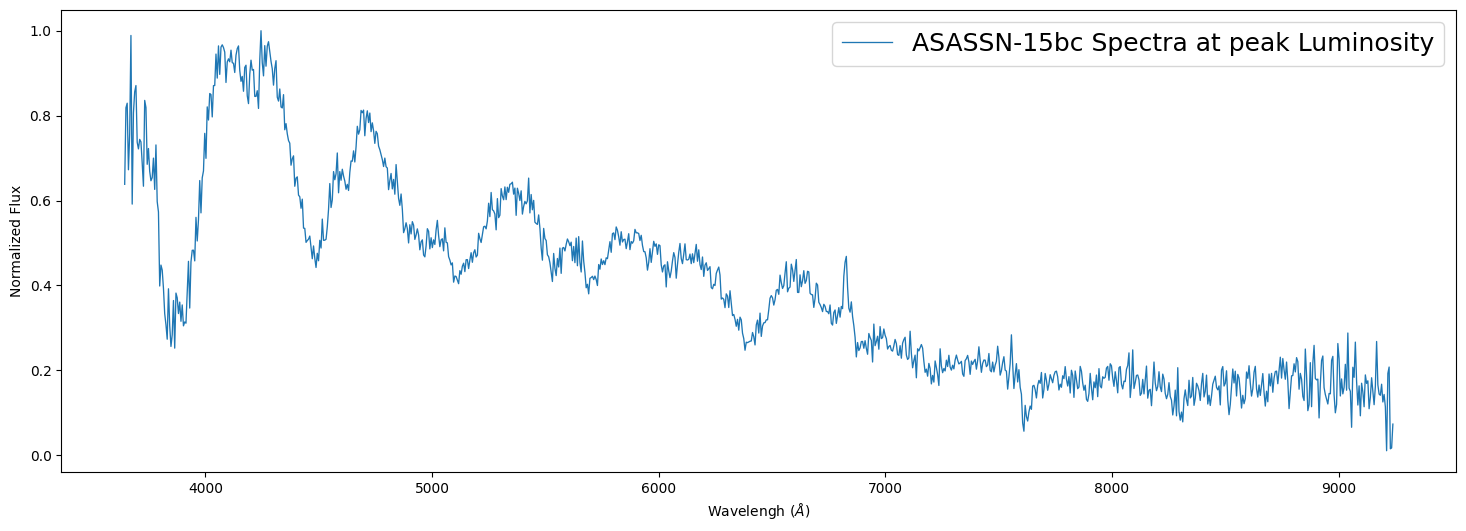

In [13]:
rcParams['figure.figsize'] = 18, 6

plt.plot(wavelengh, norm_flux, linewidth = 0.95, label = 'ASASSN-15bc Spectra at peak Luminosity')
plt.xlabel('Wavelengh ($\AA$)')
plt.ylabel('Normalized Flux')
plt.legend(fontsize = 18)

# Photometry plot for ASASSN-13cu; AstroCatalog 2010-2014

In [14]:
asassn13cu = {
	"ASASSN-13cu":{
		"schema":"https://github.com/astrocatalogs/supernovae/blob/d3ef5fc/SCHEMA.md",
		"name":"ASASSN-13cu",
		"sources":[
			{
				"name":"2016A&A...594A..13P",
				"bibcode":"2016A&A...594A..13P",
				"reference":"Planck Collaboration et al. (2016)",
				"alias":"1"
			},
			{
				"name":"2013ATel.5363....1P",
				"bibcode":"2013ATel.5363....1P",
				"reference":"Prieto et al. (2013)",
				"alias":"2"
			},
			{
				"name":"2011ApJ...737..103S",
				"bibcode":"2011ApJ...737..103S",
				"reference":"Schlafly & Finkbeiner (2011)",
				"alias":"3"
			},
			{
				"name":"Pan-STARRS 3Pi",
				"url":"https://star.pst.qub.ac.uk/ps1threepi/psdb/",
				"alias":"4"
			},
			{
				"name":"ASAS-SN Supernovae",
				"url":"http://www.astronomy.ohio-state.edu/~assassin/sn_list.html",
				"alias":"5"
			},
			{
				"name":"Latest Supernovae",
				"secondary":True,
				"url":"http://www.rochesterastronomy.org/snimages/snredshiftall.html",
				"alias":"6"
			},
			{
				"name":"The Open Supernova Catalog",
				"bibcode":"2017ApJ...835...64G",
				"reference":"Guillochon et al. (2017)",
				"secondary":True,
				"url":"https://sne.space",
				"alias":"7"
			},
			{
				"name":"SIMBAD astronomical database",
				"bibcode":"2000A&AS..143....9W",
				"reference":"Wenger et al. (2000)",
				"secondary":True,
				"url":"http://simbad.u-strasbg.fr/",
				"alias":"8"
			}
		],
		"alias":[
			{
				"value":"ASASSN-13cu",
				"source":"2,4,5,6,8"
			},
			{
				"value":"PS1-13dbv",
				"source":"2,6"
			}
		],
		"claimedtype":[
			{
				"value":"Ia",
				"source":"2,4,5,6,8"
			}
		],
		"comovingdist":[
			{
				"value":"120",
				"derived":True,
				"u_value":"Mpc",
				"source":"1,2,5,7"
			}
		],
		"dec":[
			{
				"value":"-10:26:21.9",
				"u_value":"degrees",
				"source":"2,6,8"
			},
			{
				"value":"-10:26:25.7",
				"u_value":"degrees",
				"source":"2,4"
			},
			{
				"value":"-10:26:25.8",
				"u_value":"degrees",
				"source":"2,5"
			}
		],
		"discoverdate":[
			{
				"value":"2013/09/01",
				"source":"2,6"
			}
		],
		"discoverer":[
			{
				"value":"ASAS-SN",
				"source":"2,6"
			}
		],
		"ebv":[
			{
				"value":"0.0284",
				"derived":True,
				"e_value":"0.0007",
				"source":"3,7"
			}
		],
		"host":[
			{
				"value":"PGC 2414",
				"source":"2,5,6"
			},
			{
				"value":"VIII Zw 035",
				"source":"2,4"
			}
		],
		"hostoffsetang":[
			{
				"value":"6.12",
				"u_value":"arcseconds",
				"source":"2,5"
			}
		],
		"lumdist":[
			{
				"value":"122.9",
				"derived":True,
				"u_value":"Mpc",
				"source":"1,2,5,7"
			}
		],
		"maxabsmag":[
			{
				"value":"-18.62",
				"derived":True,
				"source":"1,2,5,7"
			}
		],
		"maxappmag":[
			{
				"value":"16.8",
				"derived":True,
				"source":"2,4,7"
			}
		],
		"maxband":[
			{
				"value":"r",
				"derived":True,
				"source":"2,4,7"
			}
		],
		"maxdate":[
			{
				"value":"2013/08/27",
				"derived":True,
				"source":"2,4,7"
			}
		],
		"maxvisualabsmag":[
			{
				"value":"-18.1",
				"derived":True,
				"source":"1,2,5,7"
			}
		],
		"maxvisualappmag":[
			{
				"value":"17.35",
				"derived":True,
				"source":"2,4,7"
			}
		],
		"maxvisualband":[
			{
				"value":"g",
				"derived":True,
				"source":"2,4,7"
			}
		],
		"maxvisualdate":[
			{
				"value":"2013/09/04",
				"derived":True,
				"source":"2,4,7"
			}
		],
		"ra":[
			{
				"value":"00:40:09.93",
				"u_value":"hours",
				"source":"2,6,8"
			},
			{
				"value":"00:40:10.13",
				"u_value":"hours",
				"source":"2,4"
			},
			{
				"value":"00:40:10.128",
				"u_value":"hours",
				"source":"2,5"
			}
		],
		"redshift":[
			{
				"value":"0.0272",
				"source":"2,5"
			}
		],
		"velocity":[
			{
				"value":"8040",
				"u_value":"km/s",
				"source":"7"
			}
		],
		"photometry":[
			{
				"time":"56531.4793028785",
				"band":"r",
				"e_magnitude":"0.01515",
				"instrument":"GPC",
				"magnitude":"16.8001",
				"telescope":"Pan-STARRS1",
				"u_time":"MJD",
				"source":"2,4"
			},
			{
				"time":"56531.4903459572",
				"band":"r",
				"e_magnitude":"0.0212591",
				"instrument":"GPC",
				"magnitude":"16.7974",
				"telescope":"Pan-STARRS1",
				"u_time":"MJD",
				"source":"2,4"
			},
			{
				"time":"56531.5023780443",
				"band":"i",
				"e_magnitude":"0.0248539",
				"instrument":"GPC",
				"magnitude":"17.3228",
				"telescope":"Pan-STARRS1",
				"u_time":"MJD",
				"source":"2,4"
			},
			{
				"time":"56531.5144680948",
				"band":"i",
				"e_magnitude":"0.0231385",
				"instrument":"GPC",
				"magnitude":"17.3275",
				"telescope":"Pan-STARRS1",
				"u_time":"MJD",
				"source":"2,4"
			},
			{
				"time":"56531.6345479103",
				"band":"y",
				"e_magnitude":"0.0774985",
				"instrument":"GPC",
				"magnitude":"17.3681",
				"telescope":"Pan-STARRS1",
				"u_time":"MJD",
				"source":"2,4"
			},
			{
				"time":"56539.4479268178",
				"band":"g",
				"e_magnitude":"0.0155934",
				"instrument":"GPC",
				"magnitude":"17.3496",
				"telescope":"Pan-STARRS1",
				"u_time":"MJD",
				"source":"2,4"
			},
			{
				"time":"56539.4596139396",
				"band":"g",
				"e_magnitude":"0.0236719",
				"instrument":"GPC",
				"magnitude":"17.3475",
				"telescope":"Pan-STARRS1",
				"u_time":"MJD",
				"source":"2,4"
			},
			{
				"time":"56543.5115637178",
				"band":"g",
				"e_magnitude":"0.0393207",
				"instrument":"GPC",
				"magnitude":"17.689",
				"telescope":"Pan-STARRS1",
				"u_time":"MJD",
				"source":"2,4"
			},
			{
				"time":"56543.5238334782",
				"band":"g",
				"e_magnitude":"0.028212",
				"instrument":"GPC",
				"magnitude":"17.689",
				"telescope":"Pan-STARRS1",
				"u_time":"MJD",
				"source":"2,4"
			},
			{
				"time":"56551.4522708999",
				"band":"i",
				"e_magnitude":"0.0643006",
				"instrument":"GPC",
				"magnitude":"17.8707",
				"telescope":"Pan-STARRS1",
				"u_time":"MJD",
				"source":"2,4"
			},
			{
				"time":"56619.2287565041",
				"band":"r",
				"e_magnitude":"0.192185",
				"instrument":"GPC",
				"magnitude":"20.1509",
				"telescope":"Pan-STARRS1",
				"u_time":"MJD",
				"source":"2,4"
			},
			{
				"time":"56619.2401378467",
				"band":"r",
				"e_magnitude":"0.0959094",
				"instrument":"GPC",
				"magnitude":"20.085",
				"telescope":"Pan-STARRS1",
				"u_time":"MJD",
				"source":"2,4"
			},
			{
				"time":"56619.2530225065",
				"band":"i",
				"e_magnitude":"0.120139",
				"instrument":"GPC",
				"magnitude":"20.3659",
				"telescope":"Pan-STARRS1",
				"u_time":"MJD",
				"source":"2,4"
			},
			{
				"time":"56619.2657663194",
				"band":"i",
				"e_magnitude":"0.21058",
				"instrument":"GPC",
				"magnitude":"20.5124",
				"telescope":"Pan-STARRS1",
				"u_time":"MJD",
				"source":"2,4"
			},
			{
				"time":"56631.2890821276",
				"band":"g",
				"e_magnitude":"0.165999",
				"instrument":"GPC",
				"magnitude":"20.5025",
				"telescope":"Pan-STARRS1",
				"u_time":"MJD",
				"source":"2,4"
			},
			{
				"time":"56631.3011207879",
				"band":"g",
				"e_magnitude":"0.198198",
				"instrument":"GPC",
				"magnitude":"20.3083",
				"telescope":"Pan-STARRS1",
				"u_time":"MJD",
				"source":"2,4"
			}
		]
	}
}

In [15]:
photometry = {'time': [], 'band': [], 'magnitude': []}

for measure in asassn13cu['ASASSN-13cu']['photometry']:
    photometry['time'].append(float(measure['time']))
    photometry['band'].append(measure['band'])
    photometry['magnitude'].append(float(measure['magnitude']))
    
photometry['time'] = [x - min(photometry['time']) for x in photometry['time']]
photometry['magnitude'] =photometry['magnitude']

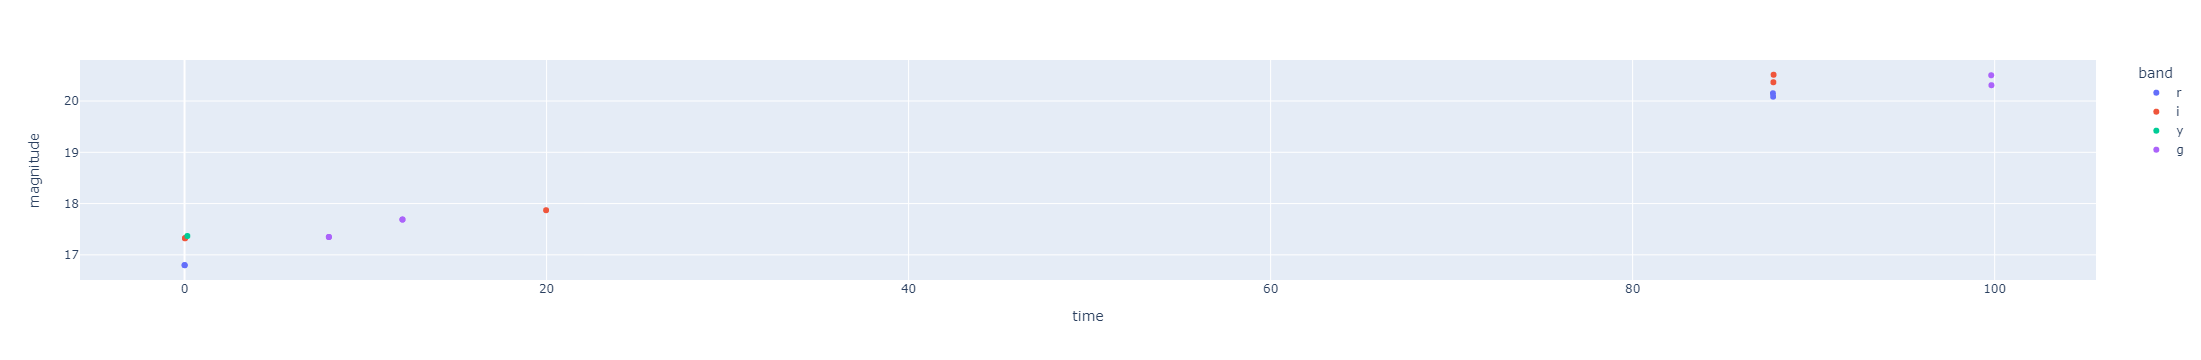

In [19]:
import plotly.express as pe
pe.scatter(photometry, x = 'time', y = 'magnitude', color = 'band')